In [9]:
# Part 1: Collecting the data for Russian public procurement from FTP server of zakupki.gov.ru
import ftplib
from ftplib import FTP
import os

In [10]:
# The data lies on the FTP server of the Russian procurement website (zakupki.gov.ru)
# There are 2 different parts on server for 2 Federal Laws (FL) under which procurement in Russia is made
# I am interested in data under FL 44 and access its FTP server part
ftp = FTP('ftp.zakupki.gov.ru')
ftp.login(user='free', passwd='free')

'230 Login successful.'

In [11]:
# Retrlines allows me to pass comands to ftp. Here I want to see a list of folders on this ftp server
data = ftp.retrlines('LIST')
print(data)

drwxrwxr-x   92 1039     1041         8192 Jun 01 22:00 94fz
-r--r-xr-x    1 1039     1041          713 Jan 04  2014 _readme.txt
drwxr-xr-x    2 1092     1040         8192 Sep 24  2014 customer_verification
drwxrwxrwx    2 1109     1040            6 Nov 15  2019 fcs_SFM
drwxrwxr-x  747 1080     1041       454656 Jul 02  2018 fcs_banks
drwxrwx---    2 1151     1158           62 Jul 13  2018 fcs_banks_hidden
drwxr-x---    9 1094     1042        12288 Apr 04  2020 fcs_discussion
drwxr-xr-x   11 1093     1040         8192 Apr 12  2018 fcs_fas
drwxrwxr-x   92 1079     1040         4096 Jun 04 11:50 fcs_nsi
drwxrwxr-x   95 1077     1040     21737472 Jun 04 15:29 fcs_regions
drwxrwxr-x   46 1078     1041         4096 Jun 29  2018 fcs_rules
drwxr-xr-x    3 1097     1043           30 Jul 28  2015 fcs_sc
drwxr-xr--    2 1089     50            206 Mar 11  2016 offline_rw
drwxr-xr-x    2 1077     1040            6 Oct 27  2017 prevMonth
drwxrwx---    3 1219     1226        40960 Jun 10 18:05 rnp
-

In [12]:
# Let's look one step futher into the folder for regions
ftp.cwd('fcs_regions') #Learning Outcome 1 (LO1 - Understand folder structure. Perform operations on files in different folders)
data = ftp.retrlines('LIST')
print(data)

-rw-r--r--    1 0        0               0 Apr 19 14:02 1.txt
-rwxr-xr-x    1 0        0           11484 Apr 19 15:41 1214.sh
-rw-r--r--    1 0        0           10346 Mar 31 22:59 23.txt
drwxr-xr-x   21 1077     1040         4096 Apr 02 15:43 Adygeja_Resp
drwxr-xr-x   22 1077     1040         4096 Apr 19 12:04 Altaj_Resp
drwxr-xr-x   22 1077     1040         4096 Apr 02 15:43 Altajskij_kraj
drwxr-xr-x   22 1077     1040         4096 Apr 02 15:43 Amurskaja_obl
drwxr-xr-x   22 1077     1040         4096 Apr 02 15:43 Arkhangelskaja_obl
drwxr-xr-x   22 1077     1040         4096 Apr 02 15:43 Astrakhanskaja_obl
drwxr-xr-x   22 1077     1040         4096 Apr 02 15:43 Bajkonur_g
drwxr-xr-x   22 1077     1040         4096 Apr 02 15:43 Bashkortostan_Resp
drwxr-xr-x   22 1077     1040         4096 Apr 02 15:43 Belgorodskaja_obl
drwxr-xr-x   22 1077     1040         4096 Apr 02 15:43 Brjanskaja_obl
drwxr-xr-x   22 1077     1040         4096 Apr 02 15:43 Burjatija_Resp
drwxr-xr-x   22 1077     1

In [13]:
# And now let's look specifically at folder for Moscow ( I will only have memory for one region and Moscow is the largest)
ftp.cwd('Moskva')
data = ftp.retrlines('LIST')
print(data)

drwxr-xr-x    4 1077     1040         8192 Jun 05 01:08 addinfo
drwxr-xr-x    4 1077     1040         8192 Jun 05 01:07 auditresult
drwxr-xr-x    4 1077     1040       102400 Jun 05 23:10 contractprojects
drwxr-xr-x    4 1077     1040       790528 Jun 07 06:23 contracts
drwxr-xr-x    9 1077     1040       114688 Apr 09 00:09 control99docs
drwxr-xr-x    4 1077     1040        77824 Jun 05 02:06 customerreports
drwxr-xr-x    4 1077     1040         8192 Jun 05 01:53 notificationExceptions
drwxr-xr-x    4 1077     1040       356352 Jun 08 21:10 notifications
drwxr-xr-x    4 1077     1040        24576 Jun 05 17:21 plangraphs
drwxr-xr-x    4 1077     1040        36864 Apr 19 15:10 plangraphs2017
drwxr-xr-x    4 1077     1040        36864 Jun 05 22:53 plangraphs2020
drwxr-xr-x    7 1077     1040          101 Apr 12  2018 pprf615docs
drwxr-xr-x    4 1077     1040       180224 Jun 05 19:42 protocols
drwxr-xr-x    4 1077     1040          128 Jun 02 12:42 protocolsfrequnl
drwxr-xr-x    4 1077  

In [14]:
# And inside Moscow I need notifications, protocols and contracts. First I look into notifications
ftp.cwd('notifications')
data = ftp.retrlines('LIST')
print(data)

drwxr-xr-x    2 1077     1040         4096 Jun 11 00:36 currMonth
-rw-rw-r--    1 1077     1040      2534570 May 13  2014 notification_Moskva_2014010100_2014020100_086.xml.zip
-rw-rw-r--    1 1077     1040       474101 May 13  2014 notification_Moskva_2014010100_2014020100_087.xml.zip
-rw-rw-r--    1 1077     1040         6289 May 13  2014 notification_Moskva_2014010100_2014020100_088.xml.zip
-rw-rw-r--    1 1077     1040         4620 Mar 20  2014 notification_Moskva_2014010600_2014010700_001.xml.zip
-rw-rw-r--    1 1077     1040         8722 Mar 20  2014 notification_Moskva_2014010900_2014011000_001.xml.zip
-rw-rw-r--    1 1077     1040        28152 Mar 20  2014 notification_Moskva_2014011000_2014011100_001.xml.zip
-rw-rw-r--    1 1077     1040        21094 Mar 20  2014 notification_Moskva_2014011100_2014011200_001.xml.zip
-rw-rw-r--    1 1077     1040        25841 Mar 21  2014 notification_Moskva_2014011300_2014011400_001.xml.zip
-rw-rw-r--    1 1077     1040       102046 Mar 21  201

-rw-rw-r--    1 1077     1040      7784324 Nov 01  2014 notification_Moskva_2014100100_2014110100_404.xml.zip
-rw-rw-r--    1 1077     1040      8117576 Nov 01  2014 notification_Moskva_2014100100_2014110100_405.xml.zip
-rw-rw-r--    1 1077     1040      8126519 Nov 01  2014 notification_Moskva_2014100100_2014110100_406.xml.zip
-rw-rw-r--    1 1077     1040      8071101 Nov 01  2014 notification_Moskva_2014100100_2014110100_407.xml.zip
-rw-rw-r--    1 1077     1040      7932079 Nov 01  2014 notification_Moskva_2014100100_2014110100_408.xml.zip
-rw-rw-r--    1 1077     1040      7605550 Nov 01  2014 notification_Moskva_2014100100_2014110100_409.xml.zip
-rw-rw-r--    1 1077     1040      7733191 Nov 01  2014 notification_Moskva_2014100100_2014110100_410.xml.zip
-rw-rw-r--    1 1077     1040      8154436 Nov 01  2014 notification_Moskva_2014100100_2014110100_411.xml.zip
-rw-rw-r--    1 1077     1040      8060446 Nov 01  2014 notification_Moskva_2014100100_2014110100_412.xml.zip
-rw-rw-r--

-rw-rw-r--    1 1077     1040       609907 Feb 06  2016 notification_Moskva_2016010100_2016020100_019.xml.zip
-rw-rw-r--    1 1077     1040       622190 Feb 06  2016 notification_Moskva_2016010100_2016020100_020.xml.zip
-rw-rw-r--    1 1077     1040        22567 Feb 06  2016 notification_Moskva_2016010100_2016020100_021.xml.zip
-rw-rw-r--    1 1077     1040        89866 Feb 06  2016 notification_Moskva_2016010100_2016020100_022.xml.zip
-rw-rw-r--    1 1077     1040      7017442 Mar 05  2016 notification_Moskva_2016020100_2016030100_001.xml.zip
-rw-rw-r--    1 1077     1040      7162865 Mar 05  2016 notification_Moskva_2016020100_2016030100_002.xml.zip
-rw-rw-r--    1 1077     1040      7019582 Mar 05  2016 notification_Moskva_2016020100_2016030100_003.xml.zip
-rw-rw-r--    1 1077     1040      7246251 Mar 05  2016 notification_Moskva_2016020100_2016030100_004.xml.zip
-rw-rw-r--    1 1077     1040      7296967 Mar 05  2016 notification_Moskva_2016020100_2016030100_005.xml.zip
-rw-rw-r--

-rw-rw-r--    1 1077     1040      6330303 Jun 04  2017 notification_Moskva_2017050100_2017060100_042.xml.zip
-rw-rw-r--    1 1077     1040      6293315 Jun 04  2017 notification_Moskva_2017050100_2017060100_043.xml.zip
-rw-rw-r--    1 1077     1040      5943272 Jun 04  2017 notification_Moskva_2017050100_2017060100_044.xml.zip
-rw-rw-r--    1 1077     1040      3021128 Jun 04  2017 notification_Moskva_2017050100_2017060100_045.xml.zip
-rw-rw-r--    1 1077     1040      2755683 Jun 04  2017 notification_Moskva_2017050100_2017060100_046.xml.zip
-rw-rw-r--    1 1077     1040      2753479 Jun 04  2017 notification_Moskva_2017050100_2017060100_047.xml.zip
-rw-rw-r--    1 1077     1040      2752897 Jun 04  2017 notification_Moskva_2017050100_2017060100_048.xml.zip
-rw-rw-r--    1 1077     1040      2754244 Jun 04  2017 notification_Moskva_2017050100_2017060100_049.xml.zip
-rw-rw-r--    1 1077     1040      2755080 Jun 04  2017 notification_Moskva_2017050100_2017060100_050.xml.zip
-rw-rw-r--

-rw-rw-r--    1 1077     1040      2762801 Dec 03  2017 notification_Moskva_2017110100_2017120100_069.xml.zip
-rw-rw-r--    1 1077     1040      2755525 Dec 03  2017 notification_Moskva_2017110100_2017120100_070.xml.zip
-rw-rw-r--    1 1077     1040      2765811 Dec 03  2017 notification_Moskva_2017110100_2017120100_071.xml.zip
-rw-rw-r--    1 1077     1040      2762367 Dec 03  2017 notification_Moskva_2017110100_2017120100_072.xml.zip
-rw-rw-r--    1 1077     1040      2764120 Dec 03  2017 notification_Moskva_2017110100_2017120100_073.xml.zip
-rw-rw-r--    1 1077     1040      1826859 Dec 03  2017 notification_Moskva_2017110100_2017120100_074.xml.zip
-rw-rw-r--    1 1077     1040         6275 Dec 03  2017 notification_Moskva_2017110100_2017120100_075.xml.zip
-rw-rw-r--    1 1077     1040        43714 Dec 03  2017 notification_Moskva_2017110100_2017120100_076.xml.zip
-rw-rw-r--    1 1077     1040      8432784 Jan 07  2018 notification_Moskva_2017120100_2018010100_001.xml.zip
-rw-rw-r--

-rw-r--r--    1 1077     1040      9685035 Jan 07  2019 notification_Moskva_2018120100_2019010100_019.xml.zip
-rw-r--r--    1 1077     1040      9491888 Jan 07  2019 notification_Moskva_2018120100_2019010100_020.xml.zip
-rw-r--r--    1 1077     1040      9302861 Jan 07  2019 notification_Moskva_2018120100_2019010100_021.xml.zip
-rw-r--r--    1 1077     1040      9469526 Jan 07  2019 notification_Moskva_2018120100_2019010100_022.xml.zip
-rw-r--r--    1 1077     1040      9336664 Jan 07  2019 notification_Moskva_2018120100_2019010100_023.xml.zip
-rw-r--r--    1 1077     1040      9557245 Jan 07  2019 notification_Moskva_2018120100_2019010100_024.xml.zip
-rw-r--r--    1 1077     1040     10060116 Jan 07  2019 notification_Moskva_2018120100_2019010100_025.xml.zip
-rw-r--r--    1 1077     1040     10359046 Jan 07  2019 notification_Moskva_2018120100_2019010100_026.xml.zip
-rw-r--r--    1 1077     1040      9689839 Jan 07  2019 notification_Moskva_2018120100_2019010100_027.xml.zip
-rw-r--r--

-rw-r--r--    1 1077     1040     11742605 Sep 30  2019 notification_Moskva_2019030100_2019040100_003.xml.zip
-rw-r--r--    1 1077     1040     11552097 Sep 30  2019 notification_Moskva_2019030100_2019040100_004.xml.zip
-rw-r--r--    1 1077     1040     11621477 Sep 30  2019 notification_Moskva_2019030100_2019040100_005.xml.zip
-rw-r--r--    1 1077     1040     11614418 Sep 30  2019 notification_Moskva_2019030100_2019040100_006.xml.zip
-rw-r--r--    1 1077     1040     12126425 Sep 30  2019 notification_Moskva_2019030100_2019040100_007.xml.zip
-rw-r--r--    1 1077     1040     11537210 Sep 30  2019 notification_Moskva_2019030100_2019040100_008.xml.zip
-rw-r--r--    1 1077     1040     11145721 Sep 30  2019 notification_Moskva_2019030100_2019040100_009.xml.zip
-rw-r--r--    1 1077     1040     11188140 Sep 30  2019 notification_Moskva_2019030100_2019040100_010.xml.zip
-rw-r--r--    1 1077     1040     11482753 Sep 30  2019 notification_Moskva_2019030100_2019040100_011.xml.zip
-rw-r--r--

226 Directory send OK.


In [16]:
out = "C:\Coding"

In [30]:
#I use ftp.nlst command to get names of files and catalogs in this folder
filenames = reversed(ftp.nlst())

In [33]:
for f in filenames:
    print(f)

prevMonth
currMonth
contract_Moskva_2021051500_2021051600_003.xml.zip
contract_Moskva_2021051500_2021051600_002.xml.zip
contract_Moskva_2021051500_2021051600_001.xml.zip
contract_Moskva_2021050800_2021050900_20210511112326_003.xml.zip
contract_Moskva_2021050800_2021050900_20210511112326_002.xml.zip
contract_Moskva_2021050800_2021050900_20210511112326_001.xml.zip
contract_Moskva_2021050100_2021060100_158.xml.zip
contract_Moskva_2021050100_2021060100_157.xml.zip
contract_Moskva_2021050100_2021060100_156.xml.zip
contract_Moskva_2021050100_2021060100_155.xml.zip
contract_Moskva_2021050100_2021060100_154.xml.zip
contract_Moskva_2021050100_2021060100_153.xml.zip
contract_Moskva_2021050100_2021060100_152.xml.zip
contract_Moskva_2021050100_2021060100_151.xml.zip
contract_Moskva_2021050100_2021060100_150.xml.zip
contract_Moskva_2021050100_2021060100_149.xml.zip
contract_Moskva_2021050100_2021060100_148.xml.zip
contract_Moskva_2021050100_2021060100_147.xml.zip
contract_Moskva_2021050100_20210601

contract_Moskva_2020070100_2020080100_051.xml.zip
contract_Moskva_2020070100_2020080100_050.xml.zip
contract_Moskva_2020070100_2020080100_049.xml.zip
contract_Moskva_2020070100_2020080100_048.xml.zip
contract_Moskva_2020070100_2020080100_047.xml.zip
contract_Moskva_2020070100_2020080100_046.xml.zip
contract_Moskva_2020070100_2020080100_045.xml.zip
contract_Moskva_2020070100_2020080100_044.xml.zip
contract_Moskva_2020070100_2020080100_043.xml.zip
contract_Moskva_2020070100_2020080100_042.xml.zip
contract_Moskva_2020070100_2020080100_041.xml.zip
contract_Moskva_2020070100_2020080100_040.xml.zip
contract_Moskva_2020070100_2020080100_039.xml.zip
contract_Moskva_2020070100_2020080100_038.xml.zip
contract_Moskva_2020070100_2020080100_037.xml.zip
contract_Moskva_2020070100_2020080100_036.xml.zip
contract_Moskva_2020070100_2020080100_035.xml.zip
contract_Moskva_2020070100_2020080100_034.xml.zip
contract_Moskva_2020070100_2020080100_033.xml.zip
contract_Moskva_2020070100_2020080100_032.xml.zip


contract_Moskva_2019120100_2020010100_074.xml.zip
contract_Moskva_2019120100_2020010100_073.xml.zip
contract_Moskva_2019120100_2020010100_072.xml.zip
contract_Moskva_2019120100_2020010100_071.xml.zip
contract_Moskva_2019120100_2020010100_070.xml.zip
contract_Moskva_2019120100_2020010100_069.xml.zip
contract_Moskva_2019120100_2020010100_068.xml.zip
contract_Moskva_2019120100_2020010100_067.xml.zip
contract_Moskva_2019120100_2020010100_066.xml.zip
contract_Moskva_2019120100_2020010100_065.xml.zip
contract_Moskva_2019120100_2020010100_064.xml.zip
contract_Moskva_2019120100_2020010100_063.xml.zip
contract_Moskva_2019120100_2020010100_062.xml.zip
contract_Moskva_2019120100_2020010100_061.xml.zip
contract_Moskva_2019120100_2020010100_060.xml.zip
contract_Moskva_2019120100_2020010100_059.xml.zip
contract_Moskva_2019120100_2020010100_058.xml.zip
contract_Moskva_2019120100_2020010100_057.xml.zip
contract_Moskva_2019120100_2020010100_056.xml.zip
contract_Moskva_2019120100_2020010100_055.xml.zip


contract_Moskva_2019050100_2019060100_20210419165338_055.xml.zip
contract_Moskva_2019050100_2019060100_20210419165338_054.xml.zip
contract_Moskva_2019050100_2019060100_20210419165338_053.xml.zip
contract_Moskva_2019050100_2019060100_20210419165338_052.xml.zip
contract_Moskva_2019050100_2019060100_20210419165338_051.xml.zip
contract_Moskva_2019050100_2019060100_20210419165338_050.xml.zip
contract_Moskva_2019050100_2019060100_20210419165338_049.xml.zip
contract_Moskva_2019050100_2019060100_20210419165338_048.xml.zip
contract_Moskva_2019050100_2019060100_20210419165338_047.xml.zip
contract_Moskva_2019050100_2019060100_20210419165338_046.xml.zip
contract_Moskva_2019050100_2019060100_20210419165338_045.xml.zip
contract_Moskva_2019050100_2019060100_20210419165338_044.xml.zip
contract_Moskva_2019050100_2019060100_20210419165338_043.xml.zip
contract_Moskva_2019050100_2019060100_20210419165338_042.xml.zip
contract_Moskva_2019050100_2019060100_20210419165338_041.xml.zip
contract_Moskva_201905010

contract_Moskva_2018120100_2019010100_082.xml.zip
contract_Moskva_2018120100_2019010100_081.xml.zip
contract_Moskva_2018120100_2019010100_080.xml.zip
contract_Moskva_2018120100_2019010100_079.xml.zip
contract_Moskva_2018120100_2019010100_078.xml.zip
contract_Moskva_2018120100_2019010100_077.xml.zip
contract_Moskva_2018120100_2019010100_076.xml.zip
contract_Moskva_2018120100_2019010100_075.xml.zip
contract_Moskva_2018120100_2019010100_074.xml.zip
contract_Moskva_2018120100_2019010100_073.xml.zip
contract_Moskva_2018120100_2019010100_072.xml.zip
contract_Moskva_2018120100_2019010100_071.xml.zip
contract_Moskva_2018120100_2019010100_070.xml.zip
contract_Moskva_2018120100_2019010100_069.xml.zip
contract_Moskva_2018120100_2019010100_068.xml.zip
contract_Moskva_2018120100_2019010100_067.xml.zip
contract_Moskva_2018120100_2019010100_066.xml.zip
contract_Moskva_2018120100_2019010100_065.xml.zip
contract_Moskva_2018120100_2019010100_064.xml.zip
contract_Moskva_2018120100_2019010100_063.xml.zip


contract_Moskva_2018020100_2018030100_031.xml.zip
contract_Moskva_2018020100_2018030100_030.xml.zip
contract_Moskva_2018020100_2018030100_029.xml.zip
contract_Moskva_2018020100_2018030100_028.xml.zip
contract_Moskva_2018020100_2018030100_027.xml.zip
contract_Moskva_2018020100_2018030100_026.xml.zip
contract_Moskva_2018020100_2018030100_025.xml.zip
contract_Moskva_2018020100_2018030100_024.xml.zip
contract_Moskva_2018020100_2018030100_023.xml.zip
contract_Moskva_2018020100_2018030100_022.xml.zip
contract_Moskva_2018020100_2018030100_021.xml.zip
contract_Moskva_2018020100_2018030100_020.xml.zip
contract_Moskva_2018020100_2018030100_019.xml.zip
contract_Moskva_2018020100_2018030100_018.xml.zip
contract_Moskva_2018020100_2018030100_017.xml.zip
contract_Moskva_2018020100_2018030100_016.xml.zip
contract_Moskva_2018020100_2018030100_015.xml.zip
contract_Moskva_2018020100_2018030100_014.xml.zip
contract_Moskva_2018020100_2018030100_013.xml.zip
contract_Moskva_2018020100_2018030100_012.xml.zip


contract_Moskva_2015120100_2016010100_072.xml.zip
contract_Moskva_2015120100_2016010100_071.xml.zip
contract_Moskva_2015120100_2016010100_070.xml.zip
contract_Moskva_2015120100_2016010100_069.xml.zip
contract_Moskva_2015120100_2016010100_068.xml.zip
contract_Moskva_2015120100_2016010100_067.xml.zip
contract_Moskva_2015120100_2016010100_066.xml.zip
contract_Moskva_2015120100_2016010100_065.xml.zip
contract_Moskva_2015120100_2016010100_064.xml.zip
contract_Moskva_2015120100_2016010100_063.xml.zip
contract_Moskva_2015120100_2016010100_062.xml.zip
contract_Moskva_2015120100_2016010100_061.xml.zip
contract_Moskva_2015120100_2016010100_060.xml.zip
contract_Moskva_2015120100_2016010100_059.xml.zip
contract_Moskva_2015120100_2016010100_058.xml.zip
contract_Moskva_2015120100_2016010100_057.xml.zip
contract_Moskva_2015120100_2016010100_056.xml.zip
contract_Moskva_2015120100_2016010100_055.xml.zip
contract_Moskva_2015120100_2016010100_054.xml.zip
contract_Moskva_2015120100_2016010100_053.xml.zip


contract_Moskva_2014060100_2014070100_411.xml.zip
contract_Moskva_2014060100_2014070100_410.xml.zip
contract_Moskva_2014060100_2014070100_409.xml.zip
contract_Moskva_2014060100_2014070100_408.xml.zip
contract_Moskva_2014060100_2014070100_407.xml.zip
contract_Moskva_2014060100_2014070100_406.xml.zip
contract_Moskva_2014060100_2014070100_405.xml.zip
contract_Moskva_2014060100_2014070100_404.xml.zip
contract_Moskva_2014060100_2014070100_403.xml.zip
contract_Moskva_2014060100_2014070100_402.xml.zip
contract_Moskva_2014060100_2014070100_401.xml.zip
contract_Moskva_2014060100_2014070100_400.xml.zip
contract_Moskva_2014060100_2014070100_399.xml.zip
contract_Moskva_2014060100_2014070100_398.xml.zip
contract_Moskva_2014050100_2014060100_393.xml.zip
contract_Moskva_2014050100_2014060100_392.xml.zip
contract_Moskva_2014050100_2014060100_391.xml.zip
contract_Moskva_2014050100_2014060100_390.xml.zip
contract_Moskva_2014050100_2014060100_389.xml.zip
contract_Moskva_2014050100_2014060100_388.xml.zip


In [34]:
#Now I download files from "notifications" folder

for filename in filenames:
    host_file = os.path.join (out, filename)
    try:
        with open(host_file, 'wb') as local_file:
            ftp.retrbinary('RETR ' + filename, local_file.write)
    except ftplib.error_perm:
        pass
 
ftp.quit()
    


'221 Goodbye.'

In [37]:
# But I also need files from "contracts" folder. So I repeat all the same things but for "contracts"
#First I get the new folder I need on ftp server
ftp = FTP('ftp.zakupki.gov.ru')
ftp.login(user='free', passwd='free')
ftp.cwd('fcs_regions')
ftp.cwd('Moskva')
ftp.cwd('contracts')



'250 Directory successfully changed.'

In [38]:
#I check which files are inside
#filenames = ftp.nlst()
filenames = reversed(ftp.nlst())


In [40]:
#I download files from "contacts" folder
out = "C:\contracts"  
for filename in filenames:
    host_file = os.path.join (out, filename)
    try:
        with open(host_file, 'wb') as local_file:
            ftp.retrbinary('RETR ' + filename, local_file.write)
    except ftplib.error_perm:
        pass
 
ftp.quit()

KeyboardInterrupt: 

In [44]:
# But I also need files from "protocols" folder. So I repeat all the same things but for "protocols"
#First I get the new folder I need on ftp server
ftp = FTP('ftp.zakupki.gov.ru')
ftp.login(user='free', passwd='free')
ftp.cwd('fcs_regions')
ftp.cwd('Moskva')
ftp.cwd('protocols')

'250 Directory successfully changed.'

In [45]:
#I check which files are inside
filenames = ftp.nlst()
print(filenames)

['currMonth', 'prevMonth', 'protocol_Moskva_2014030100_2014040100_20140710102838_047.xml.zip', 'protocol_Moskva_2014040100_2014050100_20140710103918_047.xml.zip', 'protocol_Moskva_2014050100_2014060100_048.xml.zip', 'protocol_Moskva_2014060100_2014070100_127.xml.zip', 'protocol_Moskva_2014060100_2014070100_128.xml.zip', 'protocol_Moskva_2014060100_2014070100_129.xml.zip', 'protocol_Moskva_2014060100_2014070100_130.xml.zip', 'protocol_Moskva_2014060100_2014070100_131.xml.zip', 'protocol_Moskva_2014060100_2014070100_132.xml.zip', 'protocol_Moskva_2014060100_2014070100_133.xml.zip', 'protocol_Moskva_2014060100_2014070100_134.xml.zip', 'protocol_Moskva_2014060100_2014070100_135.xml.zip', 'protocol_Moskva_2014060100_2014070100_136.xml.zip', 'protocol_Moskva_2014060100_2014070100_137.xml.zip', 'protocol_Moskva_2014060100_2014070100_138.xml.zip', 'protocol_Moskva_2014060100_2014070100_139.xml.zip', 'protocol_Moskva_2014070100_2014080100_242.xml.zip', 'protocol_Moskva_2014070100_2014080100_243

In [46]:
#I download files from "protocols" folder
out = "C:\protocols"
for filename in filenames:
    host_file = os.path.join (out, filename)
    try:
        with open(host_file, 'wb') as local_file:
            ftp.retrbinary('RETR ' + filename, local_file.write)
    except ftplib.error_perm:
        pass
 
ftp.quit()

'221 Goodbye.'

In [50]:
#Part 2: Unzipping files, parsing relevant parts of xml files and convertion to csv format
# I see that downloaded folders are xml and sig files in zipped in many folders. My strategy is to unzip files, limit them
# only to xml files and to files relevant for electronic auctions (EA44) where it possible. My research question this time
# is only about electronic auctions
# First, I install all the libraries
import csv
import xml.etree.ElementTree as ET
import os
from bs4 import BeautifulSoup


In [51]:
#check directory
os.getcwd()

'F:\\test'

In [48]:
#change directory
os.chdir("F:\\test")

In [52]:
#I want to see the structure of the file in the notification as an example

with open('xml_notification_example.xml', encoding ='utf-8') as f:
    soup = BeautifulSoup(f, 'xml')
print(soup)

<?xml version="1.0" encoding="utf-8"?>
<ns2:export xmlns="http://zakupki.gov.ru/oos/types/1" xmlns:ns2="http://zakupki.gov.ru/oos/export/1" xmlns:ns3="http://zakupki.gov.ru/oos/pprf615types/1" xmlns:ns4="http://zakupki.gov.ru/oos/base/1" xmlns:ns5="http://zakupki.gov.ru/oos/printform/1" xmlns:ns6="http://zakupki.gov.ru/oos/control99/1">
<ns2:fcsNotificationEF schemeVersion="8.1">
<id>16576445</id>
<purchaseNumber>0173200001418000676</purchaseNumber>
<docPublishDate>2018-05-30T16:24:18.352+03:00</docPublishDate>
<docNumber>№0173200001418000676</docNumber>
<href>http://zakupki.gov.ru/epz/order/notice/ea44/view/common-info.html?regNumber=0173200001418000676</href>
<printForm>
<url>http://zakupki.gov.ru/epz/order/notice/printForm/viewXml.html?noticeId=16576445</url>
<signature type="CAdES-BES">MIITBgYJKoZIhvcNAQcCoIIS9zCCEvMCAQExDDAKBgYqhQMCAgkFADALBgkqhkiG9w0BBwGggg78MIIG2TCCBoigAwIBAgIKNqzUVQAAAAABLzAIBgYqhQMCAgMwggFKMR4wHAYJKoZIhvcNAQkBFg9kaXRAbWluc3Z5YXoucnUxCzAJBgNVBAYTAlJVMRwwGgYDVQQ

In [53]:
# Now I want to prepare for parsing this example files 
tree = ET.parse("xml_notification_example.xml")
print(tree)

In [54]:
root = tree.getroot()
print(root)

<Element '{http://zakupki.gov.ru/oos/export/1}export' at 0x0000027341E14400>


In [63]:
# I want to decode xml file to convert it to csv later. I do it for electronic auctions notifications. Although there is 
#a lot of information in one xml file, I only extract relevant information for my research question.

# ! Ideally,I also need information about supplier and group to which procurement objects belong (based on OKPD codes),
# but there may be several of them for one purchase, so later i need to think how to include this as well

# Although the following code worked for 1 example xml file, there should be some minor changes if I want to loop over
#several files and later I implemented these changes.


xml_data_to_csv = open('out.csv', 'w',encoding = 'utf-8')
csv_writer = csv.writer(xml_data_to_csv)

list_head = []
list_nodes = []
    

list_head.append('id')
list_head.append('purchasenumber')
list_head.append('docpublishdate')
list_head.append('href')
list_head.append('printform_url')
list_head.append('purchaseobjectinfo')
list_head.append('responsibleorg_regnum')
list_head.append('responsibleorg_fullname')
list_head.append('responsibleorg_postaddress')
list_head.append('responsibleorg_factaddress')
list_head.append('responsibleorg_inn')
list_head.append('responsibleorg_kpp')
list_head.append('responsiblerole')
list_head.append('placingway_code')
list_head.append('placingway_name')
list_head.append('collecting_startdate')
list_head.append('collecting_place')
list_head.append('collecting_order')
list_head.append('collecting_enddate')
list_head.append('scoring_date')
list_head.append('bidding_date')
list_head.append('max_price')
list_head.append('currency_code')
list_head.append('currency_name')
list_head.append('finance_source')
list_head.append('quantity_undefined')
list_head.append('customer_regnum')
list_head.append('customer_fullname')
list_head.append('platform_code')


csv_writer.writerow(list_head)


for element in root:
    iden = element.find('{http://zakupki.gov.ru/oos/types/1}id').text
    list_nodes.append(iden)
    
    purchaseNumber = element.find('{http://zakupki.gov.ru/oos/types/1}purchaseNumber').text
    list_nodes.append(purchaseNumber)
       
    docPublishDate = element.find('{http://zakupki.gov.ru/oos/types/1}docPublishDate').text
    list_nodes.append(docPublishDate)
    
    href = element.find('{http://zakupki.gov.ru/oos/types/1}href').text
    list_nodes.append(href)

    ns_1= element.find('{http://zakupki.gov.ru/oos/types/1}printForm')
    printform_url = ns_1.find('{http://zakupki.gov.ru/oos/types/1}url')
    list_nodes.append(printform_url.text)

    purchaseObjectInfo = element.find('{http://zakupki.gov.ru/oos/types/1}purchaseObjectInfo').text
    list_nodes.append(purchaseObjectInfo)
    
    ns_2= element.find('{http://zakupki.gov.ru/oos/types/1}purchaseResponsible')
    ns_2_1 = ns_2.find('{http://zakupki.gov.ru/oos/types/1}responsibleOrg')
    responsibleorg_regnum = ns_2_1.find('{http://zakupki.gov.ru/oos/types/1}regNum').text
    list_nodes.append(responsibleorg_regnum)
    
    ns_3= element.find('{http://zakupki.gov.ru/oos/types/1}purchaseResponsible')
    ns_3_1 = ns_3.find('{http://zakupki.gov.ru/oos/types/1}responsibleOrg')
    responsibleorg_fullname = ns_3_1.find('{http://zakupki.gov.ru/oos/types/1}fullName').text
    list_nodes.append(responsibleorg_fullname)
    
    ns_4= element.find('{http://zakupki.gov.ru/oos/types/1}purchaseResponsible')
    ns_4_1 = ns_4.find('{http://zakupki.gov.ru/oos/types/1}responsibleOrg')
    responsibleorg_postadress = ns_4_1.find('{http://zakupki.gov.ru/oos/types/1}postAddress').text
    list_nodes.append(responsibleorg_postadress)
    
    ns_5= element.find('{http://zakupki.gov.ru/oos/types/1}purchaseResponsible')
    ns_5_1 = ns_5.find('{http://zakupki.gov.ru/oos/types/1}responsibleOrg')
    responsibleorg_factaddress = ns_5_1.find('{http://zakupki.gov.ru/oos/types/1}factAddress').text
    list_nodes.append(responsibleorg_factaddress)

    ns_6= element.find('{http://zakupki.gov.ru/oos/types/1}purchaseResponsible')
    ns_6_1 = ns_6.find('{http://zakupki.gov.ru/oos/types/1}responsibleOrg')
    responsibleorg_inn = ns_6_1.find('{http://zakupki.gov.ru/oos/types/1}INN').text
    list_nodes.append(responsibleorg_inn)
    
    ns_7= element.find('{http://zakupki.gov.ru/oos/types/1}purchaseResponsible')
    ns_7_1 = ns_7.find('{http://zakupki.gov.ru/oos/types/1}responsibleOrg')
    responsibleorg_kpp = ns_7_1.find('{http://zakupki.gov.ru/oos/types/1}KPP').text
    list_nodes.append(responsibleorg_kpp)

    ns_8= element.find('{http://zakupki.gov.ru/oos/types/1}purchaseResponsible')
    responsiblerole = ns_8.find('{http://zakupki.gov.ru/oos/types/1}responsibleRole').text
    list_nodes.append(responsiblerole)
    
    ns_9= element.find('{http://zakupki.gov.ru/oos/types/1}placingWay')
    placingway_code = ns_9.find('{http://zakupki.gov.ru/oos/types/1}code').text
    list_nodes.append(placingway_code)
    
    ns_10= element.find('{http://zakupki.gov.ru/oos/types/1}placingWay')
    placingway_name = ns_10.find('{http://zakupki.gov.ru/oos/types/1}name').text
    list_nodes.append(placingway_name)
    
    ns_11= element.find('{http://zakupki.gov.ru/oos/types/1}procedureInfo')
    ns_11_1 = ns_11.find('{http://zakupki.gov.ru/oos/types/1}collecting')
    collecting_startdate = ns_11_1.find('{http://zakupki.gov.ru/oos/types/1}startDate').text
    list_nodes.append(collecting_startdate)
    
    ns_12= element.find('{http://zakupki.gov.ru/oos/types/1}procedureInfo')
    ns_12_1 = ns_12.find('{http://zakupki.gov.ru/oos/types/1}collecting')
    collecting_place = ns_12_1.find('{http://zakupki.gov.ru/oos/types/1}place').text
    list_nodes.append(collecting_place)
    
    ns_13= element.find('{http://zakupki.gov.ru/oos/types/1}procedureInfo')
    ns_13_1 = ns_13.find('{http://zakupki.gov.ru/oos/types/1}collecting')
    collecting_order = ns_13_1.find('{http://zakupki.gov.ru/oos/types/1}order').text
    list_nodes.append(collecting_order)
    
    ns_14= element.find('{http://zakupki.gov.ru/oos/types/1}procedureInfo')
    ns_14_1 = ns_14.find('{http://zakupki.gov.ru/oos/types/1}collecting')
    collecting_enddate = ns_14_1.find('{http://zakupki.gov.ru/oos/types/1}endDate').text
    list_nodes.append(collecting_enddate)
    
    ns_15= element.find('{http://zakupki.gov.ru/oos/types/1}procedureInfo')
    ns_15_1 = ns_15.find('{http://zakupki.gov.ru/oos/types/1}scoring')
    scoring_date = ns_15_1.find('{http://zakupki.gov.ru/oos/types/1}date').text
    list_nodes.append(scoring_date)
    
    ns_16= element.find('{http://zakupki.gov.ru/oos/types/1}procedureInfo')
    ns_16_1 = ns_16.find('{http://zakupki.gov.ru/oos/types/1}bidding')
    bidding_date = ns_16_1.find('{http://zakupki.gov.ru/oos/types/1}date').text
    list_nodes.append(bidding_date)
    
    ns_17= element.find('{http://zakupki.gov.ru/oos/types/1}lot')
    max_price = ns_17.find('{http://zakupki.gov.ru/oos/types/1}maxPrice').text
    list_nodes.append(max_price)
    
    ns_18= element.find('{http://zakupki.gov.ru/oos/types/1}lot')
    ns_18_1 = ns_18.find('{http://zakupki.gov.ru/oos/types/1}currency')
    currency_code = ns_18_1.find('{http://zakupki.gov.ru/oos/types/1}code').text
    list_nodes.append(currency_code)
    
    ns_19= element.find('{http://zakupki.gov.ru/oos/types/1}lot')
    ns_19_1 = ns_19.find('{http://zakupki.gov.ru/oos/types/1}currency')
    currency_name = ns_19_1.find('{http://zakupki.gov.ru/oos/types/1}name').text
    list_nodes.append(currency_name)
    
    ns_20= element.find('{http://zakupki.gov.ru/oos/types/1}lot')
    finance_source = ns_20.find('{http://zakupki.gov.ru/oos/types/1}financeSource').text
    list_nodes.append(finance_source)
    
    ns_21= element.find('{http://zakupki.gov.ru/oos/types/1}lot')
    quantity_undefined = ns_21.find('{http://zakupki.gov.ru/oos/types/1}quantityUndefined').text
    list_nodes.append(quantity_undefined)
    
    ns_22_0= element.find('{http://zakupki.gov.ru/oos/types/1}lot')
    ns_22= ns_22_0.find('{http://zakupki.gov.ru/oos/types/1}customerRequirements')
    ns_22_1 = ns_22.find('{http://zakupki.gov.ru/oos/types/1}customerRequirement')
    ns_22_2 = ns_22_1.find('{http://zakupki.gov.ru/oos/types/1}customer')
    customer_regnum = ns_22_2.find('{http://zakupki.gov.ru/oos/types/1}regNum').text
    list_nodes.append(customer_regnum)
    
    ns_22_0= element.find('{http://zakupki.gov.ru/oos/types/1}lot')
    ns_22= ns_22_0.find('{http://zakupki.gov.ru/oos/types/1}customerRequirements')
    ns_22_1 = ns_22.find('{http://zakupki.gov.ru/oos/types/1}customerRequirement')
    ns_22_2 = ns_22_1.find('{http://zakupki.gov.ru/oos/types/1}customer')
    customer_fullname = ns_22_2.find('{http://zakupki.gov.ru/oos/types/1}fullName').text
    list_nodes.append(customer_fullname)
    

    ns23 = element.find('{http://zakupki.gov.ru/oos/types/1}ETP')
    platform_code = ns23.find('{http://zakupki.gov.ru/oos/types/1}code').text
    list_nodes.append(platform_code)
    
    
    csv_writer.writerow(list_nodes)
    

xml_data_to_csv.close()
     



In [62]:
print(list_head)
print(list_nodes)

['id', 'purchasenumber', 'docpublishdate', 'href', 'printform_url', 'purchaseobjectinfo', 'responsibleorg_regnum', 'responsibleorg_fullname', 'responsibleorg_postaddress', 'responsibleorg_factaddress', 'responsibleorg_inn', 'responsibleorg_kpp', 'responsiblerole', 'placingway_code', 'placingway_name', 'collecting_startdate', 'collecting_place', 'collecting_order', 'collecting_enddate', 'scoring_date', 'bidding_date', 'max_price', 'currency_code', 'currency_name', 'finance_source', 'quantity_undefined', 'customer_regnum', 'customer_fullname', 'platform_code']
['16576445', '0173200001418000676', '2018-05-30T16:24:18.352+03:00', 'http://zakupki.gov.ru/epz/order/notice/ea44/view/common-info.html?regNumber=0173200001418000676', 'http://zakupki.gov.ru/epz/order/notice/printForm/viewXml.html?noticeId=16576445', 'Аукцион в электронной форме на право заключения контракта на поставку лекарственных препаратов (Алглюкозидаза альфа) для индивидуального обеспечения отдельных категорий граждан, имеющ

In [101]:
#Next I want to decode contracts. There I am mostly interested in purchase number (a different name then in notifications),
#final price and execution time 
#I want to see the structure of the file which I use an example

with open('xml_contract_example.xml', encoding ='utf-8') as f:
    soup = BeautifulSoup(f, 'xml')
print(soup)

<?xml version="1.0" encoding="utf-8"?>
<ns2:export xmlns="http://zakupki.gov.ru/oos/types/1" xmlns:ns2="http://zakupki.gov.ru/oos/export/1" xmlns:ns3="http://zakupki.gov.ru/oos/printform/1" xmlns:ns4="http://zakupki.gov.ru/oos/control99/1">
<ns2:contract schemeVersion="7.5">
<id>39738202</id>
<publishDate>2018-01-30T12:54:32.212+03:00</publishDate>
<versionNumber>10</versionNumber>
<foundation>
<oosOrder>
<singleCustomer>
<reason>
<code>1</code>
<name>Пункт 1 части 2 статьи 55 – Поставки товаров, выполнение работ, оказание услуг относятся к сфере деятельности субъектов естественных монополий</name>
</reason>
</singleCustomer>
</oosOrder>
</foundation>
<customer>
<regNum>01731000022</regNum>
<consRegistryNum>00100310</consRegistryNum>
<fullName>МИНИСТЕРСТВО ИНОСТРАННЫХ ДЕЛ РОССИЙСКОЙ ФЕДЕРАЦИИ</fullName>
<shortName>МИД РОССИИ</shortName>
<registrationDate>1999-10-28</registrationDate>
<inn>7704206201</inn>
<kpp>770401001</kpp>
<legalForm>
<code>75104</code>
<singularName>Федеральные гос

In [106]:
tree = ET.parse("xml_contract_example.xml")
print(tree)
root = tree.getroot()
print(root)

<Element '{http://zakupki.gov.ru/oos/export/1}export' at 0x000002734829EC70>


In [110]:
#Same as before
# Changes are implemented when i later usei it to loop over files (for instance, I use later  try and except)
xml_data_to_csv = open('out_try.csv', 'w', encoding = 'utf-8')
csv_writer = csv.writer(xml_data_to_csv)

list_head = []
list_nodes = []
    

list_head.append('id_contract')
list_head.append('publishdate_contract')
list_head.append('purchasenumber')
list_head.append('final_price')
list_head.append('execution_startdate')
list_head.append('execution_enddate')
list_head.append('supplier_inn')

csv_writer.writerow(list_head)

for element in root:
        
        
        
        try:
            iden = element.find('{http://zakupki.gov.ru/oos/types/1}id').text
            list_nodes.append(iden)
        except: continue
        
        try:
            publishdate_contract = element.find('{http://zakupki.gov.ru/oos/types/1}publishDate').text
            list_nodes.append(publishdate_contract)
        except: continue
        
        try:
            ns = element.find('{http://zakupki.gov.ru/oos/types/1}foundation')
            ns_1 = ns.find('{http://zakupki.gov.ru/oos/types/1}fcsOrder')
            ns_2 = ns_1.find('{http://zakupki.gov.ru/oos/types/1}order')
            purchasenumber = ns_2.find('{http://zakupki.gov.ru/oos/types/1}notificationNumber').text
            list_nodes.append(purchasenumber)
        except: continue
            
            
        try:
            ns1 = element.find('{http://zakupki.gov.ru/oos/types/1}priceInfo')
            final_price = ns1.find('{http://zakupki.gov.ru/oos/types/1}price').text
            list_nodes.append(final_price)
        except: continue
            
        try:
            ns2 = element.find('{http://zakupki.gov.ru/oos/types/1}executionPeriod')
            execution_startdate = ns2.find('{http://zakupki.gov.ru/oos/types/1}startDate').text
            list_nodes.append(execution_startdate)
        except: continue
            
            
        try:
            ns3 = element.find('{http://zakupki.gov.ru/oos/types/1}executionPeriod')
            execution_enddate = ns3.find('{http://zakupki.gov.ru/oos/types/1}endDate').text
            list_nodes.append(execution_enddate)
        except: continue
            
        try:
            ns4 = element.find('{http://zakupki.gov.ru/oos/types/1}suppliers')
            ns4_1 = ns4.find('{http://zakupki.gov.ru/oos/types/1}supplier')
            ns4_2 = ns4_1.find('{http://zakupki.gov.ru/oos/types/1}legalEntityRF')
            
            supplier_inn = ns4_2.find('{http://zakupki.gov.ru/oos/types/1}INN').text
            list_nodes.append(supplier_inn)
        except: continue    
    
csv_writer.writerow(list_nodes)
    
    
xml_data_to_csv.close()  


In [111]:
print(list_head)

['id_contract', 'publishdate_contract', 'purchasenumber', 'final_price', 'execution_startdate', 'execution_enddate', 'supplier_inn']


In [112]:
print(list_nodes)

['41019076', '2018-03-28T15:41:46.797+03:00', '0373200594915000108', '600000.00', '2016-01-01', '2016-12-31', '7701984274']


In [41]:
# I don't do anything for protocols there. But there I also have number of participants which became 
#irrelevant since i do analysis for the buyer level

In [69]:
# Now I actually need to extrapolate this for the case when I have multiple xml files. They were in zip folders



# Overall I have 5 groups: 2018_1 (first half of 2018), 2018_2, 2019_1, 2019_2, 2020. I used the following code one by
# one for all of them, changing the name of csv file and path

import os
from xml.etree import ElementTree as ET
import csv


path = "F:\\notifications_2020"

xml_data_to_csv = open('out_notifications_2020.csv', 'w', encoding ='utf-8')
csv_writer = csv.writer(xml_data_to_csv)
    


list_head = []

    

list_head.append('id')
list_head.append('purchasenumber')
list_head.append('docpublishdate')
list_head.append('href')
list_head.append('printform_url')
list_head.append('purchaseobjectinfo')
list_head.append('responsibleorg_regnum')
list_head.append('responsibleorg_fullname')
list_head.append('responsibleorg_postaddress')
list_head.append('responsibleorg_factaddress')
list_head.append('responsibleorg_inn')
list_head.append('responsibleorg_kpp')
list_head.append('responsiblerole')
list_head.append('placingway_code')
list_head.append('placingway_name')
list_head.append('collecting_startdate')
list_head.append('collecting_place')
list_head.append('collecting_order')
list_head.append('collecting_enddate')
list_head.append('scoring_date')
list_head.append('bidding_date')
list_head.append('max_price')
list_head.append('currency_code')
list_head.append('currency_name')
list_head.append('finance_source')
list_head.append('quantity_undefined')
list_head.append('customer_regnum')
list_head.append('customer_fullname')
list_head.append('platform_code')

csv_writer.writerow(list_head)

for filename in os.listdir(path):
    
    # I want to get only xml files since I also have "sig" files
    if not filename.endswith('.xml'): continue
    # And only get files that start with 'fcsNotificationEA44_' since these are notifications for electronic auctions
    if not filename.startswith('fcsNotificationEA44_'): continue
    
    # And now let's parse these files and convert to csv as I did before for just 1 file:
    
    fullname = os.path.join(path, filename)
    
    tree = ET.parse(fullname)
    root = tree.getroot()
    
    for element in root:
        
        list_nodes= []
        
        iden = element.find('{http://zakupki.gov.ru/oos/types/1}id').text
        list_nodes.append(iden)
    
        purchaseNumber = element.find('{http://zakupki.gov.ru/oos/types/1}purchaseNumber').text
        list_nodes.append(purchaseNumber)
       
        docPublishDate = element.find('{http://zakupki.gov.ru/oos/types/1}docPublishDate').text
        list_nodes.append(docPublishDate)
    
        href = element.find('{http://zakupki.gov.ru/oos/types/1}href').text
        list_nodes.append(href)

        ns_1= element.find('{http://zakupki.gov.ru/oos/types/1}printForm')
        printform_url = ns_1.find('{http://zakupki.gov.ru/oos/types/1}url')
        list_nodes.append(printform_url.text)

        purchaseObjectInfo = element.find('{http://zakupki.gov.ru/oos/types/1}purchaseObjectInfo').text
        list_nodes.append(purchaseObjectInfo)
    
        ns_2= element.find('{http://zakupki.gov.ru/oos/types/1}purchaseResponsible')
        ns_2_1 = ns_2.find('{http://zakupki.gov.ru/oos/types/1}responsibleOrg')
        responsibleorg_regnum = ns_2_1.find('{http://zakupki.gov.ru/oos/types/1}regNum').text
        list_nodes.append(responsibleorg_regnum)
    
        ns_3= element.find('{http://zakupki.gov.ru/oos/types/1}purchaseResponsible')
        ns_3_1 = ns_3.find('{http://zakupki.gov.ru/oos/types/1}responsibleOrg')
        responsibleorg_fullname = ns_3_1.find('{http://zakupki.gov.ru/oos/types/1}fullName').text
        list_nodes.append(responsibleorg_fullname)
    
        ns_4= element.find('{http://zakupki.gov.ru/oos/types/1}purchaseResponsible')
        ns_4_1 = ns_4.find('{http://zakupki.gov.ru/oos/types/1}responsibleOrg')
        responsibleorg_postadress = ns_4_1.find('{http://zakupki.gov.ru/oos/types/1}postAddress').text
        list_nodes.append(responsibleorg_postadress)
    
        ns_5= element.find('{http://zakupki.gov.ru/oos/types/1}purchaseResponsible')
        ns_5_1 = ns_5.find('{http://zakupki.gov.ru/oos/types/1}responsibleOrg')
        responsibleorg_factaddress = ns_5_1.find('{http://zakupki.gov.ru/oos/types/1}factAddress').text
        list_nodes.append(responsibleorg_factaddress)

        ns_6= element.find('{http://zakupki.gov.ru/oos/types/1}purchaseResponsible')
        ns_6_1 = ns_6.find('{http://zakupki.gov.ru/oos/types/1}responsibleOrg')
        responsibleorg_inn = ns_6_1.find('{http://zakupki.gov.ru/oos/types/1}INN').text
        list_nodes.append(responsibleorg_inn)
    
        ns_7= element.find('{http://zakupki.gov.ru/oos/types/1}purchaseResponsible')
        ns_7_1 = ns_7.find('{http://zakupki.gov.ru/oos/types/1}responsibleOrg')
        responsibleorg_kpp = ns_7_1.find('{http://zakupki.gov.ru/oos/types/1}KPP').text
        list_nodes.append(responsibleorg_kpp)

        ns_8= element.find('{http://zakupki.gov.ru/oos/types/1}purchaseResponsible')
        responsiblerole = ns_8.find('{http://zakupki.gov.ru/oos/types/1}responsibleRole').text
        list_nodes.append(responsiblerole)
    
        ns_9= element.find('{http://zakupki.gov.ru/oos/types/1}placingWay')
        placingway_code = ns_9.find('{http://zakupki.gov.ru/oos/types/1}code').text
        list_nodes.append(placingway_code)
    
        ns_10= element.find('{http://zakupki.gov.ru/oos/types/1}placingWay')
        placingway_name = ns_10.find('{http://zakupki.gov.ru/oos/types/1}name').text
        list_nodes.append(placingway_name)
    
        ns_11= element.find('{http://zakupki.gov.ru/oos/types/1}procedureInfo')
        ns_11_1 = ns_11.find('{http://zakupki.gov.ru/oos/types/1}collecting')
        collecting_startdate = ns_11_1.find('{http://zakupki.gov.ru/oos/types/1}startDate').text
        list_nodes.append(collecting_startdate)
    
        ns_12= element.find('{http://zakupki.gov.ru/oos/types/1}procedureInfo')
        ns_12_1 = ns_12.find('{http://zakupki.gov.ru/oos/types/1}collecting')
        collecting_place = ns_12_1.find('{http://zakupki.gov.ru/oos/types/1}place').text
        list_nodes.append(collecting_place)
    
        ns_13= element.find('{http://zakupki.gov.ru/oos/types/1}procedureInfo')
        ns_13_1 = ns_13.find('{http://zakupki.gov.ru/oos/types/1}collecting')
        collecting_order = ns_13_1.find('{http://zakupki.gov.ru/oos/types/1}order').text
        list_nodes.append(collecting_order)
    
        ns_14= element.find('{http://zakupki.gov.ru/oos/types/1}procedureInfo')
        ns_14_1 = ns_14.find('{http://zakupki.gov.ru/oos/types/1}collecting')
        collecting_enddate = ns_14_1.find('{http://zakupki.gov.ru/oos/types/1}endDate').text
        list_nodes.append(collecting_enddate)
        
        try:
            ns_15= element.find('{http://zakupki.gov.ru/oos/types/1}procedureInfo')
            ns_15_1 = ns_15.find('{http://zakupki.gov.ru/oos/types/1}scoring')
            scoring_date = ns_15_1.find('{http://zakupki.gov.ru/oos/types/1}date').text
            list_nodes.append(scoring_date)
        except: continue
    
        ns_16= element.find('{http://zakupki.gov.ru/oos/types/1}procedureInfo')
        ns_16_1 = ns_16.find('{http://zakupki.gov.ru/oos/types/1}bidding')
        bidding_date = ns_16_1.find('{http://zakupki.gov.ru/oos/types/1}date').text
        list_nodes.append(bidding_date)
    
        ns_17= element.find('{http://zakupki.gov.ru/oos/types/1}lot')
        max_price = ns_17.find('{http://zakupki.gov.ru/oos/types/1}maxPrice').text
        list_nodes.append(max_price)
    
        ns_18= element.find('{http://zakupki.gov.ru/oos/types/1}lot')
        ns_18_1 = ns_18.find('{http://zakupki.gov.ru/oos/types/1}currency')
        currency_code = ns_18_1.find('{http://zakupki.gov.ru/oos/types/1}code').text
        list_nodes.append(currency_code)
    
        ns_19= element.find('{http://zakupki.gov.ru/oos/types/1}lot')
        ns_19_1 = ns_19.find('{http://zakupki.gov.ru/oos/types/1}currency')
        currency_name = ns_19_1.find('{http://zakupki.gov.ru/oos/types/1}name').text
        list_nodes.append(currency_name)
    
        try:
            ns_20= element.find('{http://zakupki.gov.ru/oos/types/1}lot')
            finance_source = ns_20.find('{http://zakupki.gov.ru/oos/types/1}financeSource').text
            list_nodes.append(finance_source)
        except: continue
    
        ns_21= element.find('{http://zakupki.gov.ru/oos/types/1}lot')
        quantity_undefined = ns_21.find('{http://zakupki.gov.ru/oos/types/1}quantityUndefined').text
        list_nodes.append(quantity_undefined)
    
        ns_22_0= element.find('{http://zakupki.gov.ru/oos/types/1}lot')
        ns_22= ns_22_0.find('{http://zakupki.gov.ru/oos/types/1}customerRequirements')
        ns_22_1 = ns_22.find('{http://zakupki.gov.ru/oos/types/1}customerRequirement')
        ns_22_2 = ns_22_1.find('{http://zakupki.gov.ru/oos/types/1}customer')
        customer_regnum = ns_22_2.find('{http://zakupki.gov.ru/oos/types/1}regNum').text
        list_nodes.append(customer_regnum)
    
        ns_22_0= element.find('{http://zakupki.gov.ru/oos/types/1}lot')
        ns_22= ns_22_0.find('{http://zakupki.gov.ru/oos/types/1}customerRequirements')
        ns_22_1 = ns_22.find('{http://zakupki.gov.ru/oos/types/1}customerRequirement')
        ns_22_2 = ns_22_1.find('{http://zakupki.gov.ru/oos/types/1}customer')
        customer_fullname = ns_22_2.find('{http://zakupki.gov.ru/oos/types/1}fullName').text
        list_nodes.append(customer_fullname)
        
        ns23 = element.find('{http://zakupki.gov.ru/oos/types/1}ETP')
        platform_code = ns23.find('{http://zakupki.gov.ru/oos/types/1}code').text
        list_nodes.append(platform_code)
    
    
        csv_writer.writerow(list_nodes)
    

    
xml_data_to_csv.close()
    
    

In [25]:
print(list_head)

['id', 'purchasenumber', 'docpublishdate', 'href', 'printform_url', 'purchaseobjectinfo', 'responsibleorg_regnum', 'responsibleorg_fullname', 'responsibleorg_postaddress', 'responsibleorg_factaddress', 'responsibleorg_inn', 'responsibleorg_kpp', 'responsiblerole', 'placingway_code', 'placingway_name', 'collecting_startdate', 'collecting_place', 'collecting_order', 'collecting_enddate', 'scoring_date', 'bidding_date', 'max_price', 'currency_code', 'currency_name', 'finance_source', 'quantity_undefined', 'customer_regnum', 'customer_fullname']


In [26]:
print(list_nodes)

['15474491', '0373100041118000001', '2018-03-05T12:40:15.547+03:00', 'http://zakupki.gov.ru/epz/order/notice/ea44/view/common-info.html?regNumber=0373100041118000001', 'http://zakupki.gov.ru/epz/order/notice/printForm/viewXml.html?noticeId=15474491', 'Оказание услуг по вывозу ТБО', '03731000411', 'ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ НАУЧНО-ИССЛЕДОВАТЕЛЬСКОЕ УЧРЕЖДЕНИЕ "ГОСУДАРСТВЕННЫЙ НАУЧНО-ИССЛЕДОВАТЕЛЬСКИЙ ИНСТИТУТ РЕСТАВРАЦИИ"', '107014, г Москва, ул Гастелло, дом 44, строение 1', 'Российская Федерация, 107014, Москва, Гастелло ул, 44/1', '7718059684', '771801001', 'CU', 'EAP44', 'Электронный аукцион', '2018-03-05T12:40:15+03:00', 'Заявка на участие в Аукционе направляется Участником Аукциона оператору электронной площадки', 'Заявка на участие в Аукционе направляется Участником Аукциона оператору электронной в форме двух электронных документов, содержащих части заявки, предусмотренные Документацией об электронном аукционе.', '2018-03-15T10:00:00+03:00', '2018-03-16T00:00:00+03:00

In [74]:
os.getcwd()

'F:\\test'

In [66]:
os.chdir("D:\contracts_out")

In [67]:
os.getcwd()

'D:\\contracts_out'

In [121]:
# The solution I found for bigger folder of contracts is unzip based on condition and at least get only relevant xml files
# I run this code for each of smaller groups of conracts (2018_1,2018_2, 2019_1,2019_2, 2020) changing directory
import os, zipfile

dir_name = "C:\\contracts_fifth"
extension = ".zip"

os.chdir(dir_name) # change directory from working dir to dir with files

for item in os.listdir(dir_name): # loop through items in dir
    if item.endswith(extension): # check for ".zip" extension
        file_name = os.path.abspath(item) # get full path of files
        zip_ref = zipfile.ZipFile(file_name) # create zipfile object
        listOfFileNames = zip_ref.namelist()
        for fileName in listOfFileNames:
            if fileName.endswith('.xml'):
                if fileName.startswith('contract_'):
                    zip_ref.extract(fileName)
        
        

In [117]:
os.chdir("C:\\out_contracts_four")

In [118]:
os.getcwd()

'C:\\out_contracts_four'

In [122]:
# And now when I have files as xmls I again parse them one by one and convert to csv. 
#I again do it for each of the 5 groups changing path and name of csv file in the code
# For contracts 2020:

import os
from xml.etree import ElementTree as ET
import csv


path = "C:\\contracts_fifth"

xml_data_to_csv = open('out_contracts_2020.csv', 'w', encoding ='utf-8')
csv_writer = csv.writer(xml_data_to_csv)
    


list_head = []

list_head.append('id_contract')
list_head.append('publishdate_contract')
list_head.append('purchasenumber')
list_head.append('final_price')
list_head.append('execution_startdate')
list_head.append('execution_enddate')
list_head.append('supplier_inn')


csv_writer.writerow(list_head)

for filename in os.listdir(path):
    
    # I want to get only xml files since I also have "sig" files
    if not filename.endswith('.xml'): continue
    
    # And now let's parse these files and convert to csv as I did before for just 1 file:
    
    fullname = os.path.join(path, filename)
    
    tree = ET.parse(fullname)
    root = tree.getroot()
    
    for element in root:
        
        list_nodes= []
        
        try:
            iden = element.find('{http://zakupki.gov.ru/oos/types/1}id').text
            list_nodes.append(iden)
        except: continue
        
        try:
            publishdate_contract = element.find('{http://zakupki.gov.ru/oos/types/1}publishDate').text
            list_nodes.append(publishdate_contract)
        except: continue
        
        try:
            ns = element.find('{http://zakupki.gov.ru/oos/types/1}foundation')
            ns_1 = ns.find('{http://zakupki.gov.ru/oos/types/1}fcsOrder')
            ns_2 = ns_1.find('{http://zakupki.gov.ru/oos/types/1}order')
            purchasenumber = ns_2.find('{http://zakupki.gov.ru/oos/types/1}notificationNumber').text
            list_nodes.append(purchasenumber)
        except: continue
            
            
        try:
            ns1 = element.find('{http://zakupki.gov.ru/oos/types/1}priceInfo')
            final_price = ns1.find('{http://zakupki.gov.ru/oos/types/1}price').text
            list_nodes.append(final_price)
        except: continue
            
        try:
            ns2 = element.find('{http://zakupki.gov.ru/oos/types/1}executionPeriod')
            execution_startdate = ns2.find('{http://zakupki.gov.ru/oos/types/1}startDate').text
            list_nodes.append(execution_startdate)
        except: continue
            
            
        try:
            ns3 = element.find('{http://zakupki.gov.ru/oos/types/1}executionPeriod')
            execution_enddate = ns3.find('{http://zakupki.gov.ru/oos/types/1}endDate').text
            list_nodes.append(execution_enddate)
        except: continue
            
        try:
            ns4 = element.find('{http://zakupki.gov.ru/oos/types/1}suppliers')
            ns4_1 = ns4.find('{http://zakupki.gov.ru/oos/types/1}supplier')
            ns4_2 = ns4_1.find('{http://zakupki.gov.ru/oos/types/1}legalEntityRF')
            
            supplier_inn = ns4_2.find('{http://zakupki.gov.ru/oos/types/1}INN').text
            list_nodes.append(supplier_inn)
        except: continue    
    
    csv_writer.writerow(list_nodes)
    

    
xml_data_to_csv.close()
    
    

In [114]:
# And now when I have files as xmls I again parse them one by one and convert to csv. 
#I again do it for each of the 5 groups changing path and name of csv file in the code
# For contracts 2020:

import os
from xml.etree import ElementTree as ET
import csv


path = "F:\\contracts_second"

xml_data_to_csv = open('out_contracts_2018_2.csv', 'w', encoding ='utf-8')
csv_writer = csv.writer(xml_data_to_csv)
    


list_head = []

list_head.append('id_contract')
list_head.append('publishdate_contract')
list_head.append('purchasenumber')
list_head.append('final_price')
list_head.append('execution_startdate')
list_head.append('execution_enddate')
list_head.append('supplier_inn')


csv_writer.writerow(list_head)

for filename in os.listdir(path):
    
    # I want to get only xml files since I also have "sig" files
    if not filename.endswith('.xml'): continue
    
    # And now let's parse these files and convert to csv as I did before for just 1 file:
    
    fullname = os.path.join(path, filename)
    
    tree = ET.parse(fullname)
    root = tree.getroot()
    
    for element in root:
        
        list_nodes= []
        
        try:
            iden = element.find('{http://zakupki.gov.ru/oos/types/1}id').text
            list_nodes.append(iden)
        except: continue
        
        try:
            publishdate_contract = element.find('{http://zakupki.gov.ru/oos/types/1}publishDate').text
            list_nodes.append(publishdate_contract)
        except: continue
        
        try:
            ns = element.find('{http://zakupki.gov.ru/oos/types/1}foundation')
            ns_1 = ns.find('{http://zakupki.gov.ru/oos/types/1}fcsOrder')
            ns_2 = ns_1.find('{http://zakupki.gov.ru/oos/types/1}order')
            purchasenumber = ns_2.find('{http://zakupki.gov.ru/oos/types/1}notificationNumber').text
            list_nodes.append(purchasenumber)
        except: continue
            
            
        try:
            ns1 = element.find('{http://zakupki.gov.ru/oos/types/1}priceInfo')
            final_price = ns1.find('{http://zakupki.gov.ru/oos/types/1}price').text
            list_nodes.append(final_price)
        except: continue
            
        try:
            ns2 = element.find('{http://zakupki.gov.ru/oos/types/1}executionPeriod')
            execution_startdate = ns2.find('{http://zakupki.gov.ru/oos/types/1}startDate').text
            list_nodes.append(execution_startdate)
        except: continue
            
            
        try:
            ns3 = element.find('{http://zakupki.gov.ru/oos/types/1}executionPeriod')
            execution_enddate = ns3.find('{http://zakupki.gov.ru/oos/types/1}endDate').text
            list_nodes.append(execution_enddate)
        except: continue
            
        try:
            ns4 = element.find('{http://zakupki.gov.ru/oos/types/1}suppliers')
            ns4_1 = ns4.find('{http://zakupki.gov.ru/oos/types/1}supplier')
            ns4_2 = ns4_1.find('{http://zakupki.gov.ru/oos/types/1}legalEntityRF')
            
            supplier_inn = ns4_2.find('{http://zakupki.gov.ru/oos/types/1}INN').text
            list_nodes.append(supplier_inn)
        except: continue    
    
    csv_writer.writerow(list_nodes)
    

    
xml_data_to_csv.close()
    
    
    

In [115]:
# And now when I have files as xmls I again parse them one by one and convert to csv. 
#I again do it for each of the 5 groups changing path and name of csv file in the code
# For contracts 2020:

import os
from xml.etree import ElementTree as ET
import csv


path = "F:\\contracts_third"

xml_data_to_csv = open('out_contracts_2019_1.csv', 'w', encoding ='utf-8')
csv_writer = csv.writer(xml_data_to_csv)
    


list_head = []

list_head.append('id_contract')
list_head.append('publishdate_contract')
list_head.append('purchasenumber')
list_head.append('final_price')
list_head.append('execution_startdate')
list_head.append('execution_enddate')
list_head.append('supplier_inn')


csv_writer.writerow(list_head)

for filename in os.listdir(path):
    
    # I want to get only xml files since I also have "sig" files
    if not filename.endswith('.xml'): continue
    
    # And now let's parse these files and convert to csv as I did before for just 1 file:
    
    fullname = os.path.join(path, filename)
    
    tree = ET.parse(fullname)
    root = tree.getroot()
    
    for element in root:
        
        list_nodes= []
        
        try:
            iden = element.find('{http://zakupki.gov.ru/oos/types/1}id').text
            list_nodes.append(iden)
        except: continue
        
        try:
            publishdate_contract = element.find('{http://zakupki.gov.ru/oos/types/1}publishDate').text
            list_nodes.append(publishdate_contract)
        except: continue
        
        try:
            ns = element.find('{http://zakupki.gov.ru/oos/types/1}foundation')
            ns_1 = ns.find('{http://zakupki.gov.ru/oos/types/1}fcsOrder')
            ns_2 = ns_1.find('{http://zakupki.gov.ru/oos/types/1}order')
            purchasenumber = ns_2.find('{http://zakupki.gov.ru/oos/types/1}notificationNumber').text
            list_nodes.append(purchasenumber)
        except: continue
            
            
        try:
            ns1 = element.find('{http://zakupki.gov.ru/oos/types/1}priceInfo')
            final_price = ns1.find('{http://zakupki.gov.ru/oos/types/1}price').text
            list_nodes.append(final_price)
        except: continue
            
        try:
            ns2 = element.find('{http://zakupki.gov.ru/oos/types/1}executionPeriod')
            execution_startdate = ns2.find('{http://zakupki.gov.ru/oos/types/1}startDate').text
            list_nodes.append(execution_startdate)
        except: continue
            
            
        try:
            ns3 = element.find('{http://zakupki.gov.ru/oos/types/1}executionPeriod')
            execution_enddate = ns3.find('{http://zakupki.gov.ru/oos/types/1}endDate').text
            list_nodes.append(execution_enddate)
        except: continue
            
        try:
            ns4 = element.find('{http://zakupki.gov.ru/oos/types/1}suppliers')
            ns4_1 = ns4.find('{http://zakupki.gov.ru/oos/types/1}supplier')
            ns4_2 = ns4_1.find('{http://zakupki.gov.ru/oos/types/1}legalEntityRF')
            
            supplier_inn = ns4_2.find('{http://zakupki.gov.ru/oos/types/1}INN').text
            list_nodes.append(supplier_inn)
        except: continue    
    
    csv_writer.writerow(list_nodes)
    

    
xml_data_to_csv.close()
    
    
    

In [124]:
 # Part 3: Working with data in csv files: merging them and changing variables

import os
import glob
import pandas as pd


In [125]:
os.getcwd()


'C:\\notifications_out'

In [126]:
# I am merging my 5 csv notifications file in 1
 
os.chdir("C:\\notifications_out") # in this folder are only my csv notifications for 5 periods
extension = 'csv'
filenames = [i for i in glob.glob('*.{}'.format(extension))] 
print(filenames) #just to check that these are the files I need
notifications_2018_2020 = pd.concat([pd.read_csv(f) for f in filenames ])
#export to csv
notifications_2018_2020.to_csv( "notifications_2018_2020.csv", index=False, encoding='utf-8')

['out_notifications_2018_1.csv', 'out_notifications_2018_2.csv', 'out_notifications_2019_1.csv', 'out_notifications_2019_2.csv', 'out_notifications_2020.csv']


In [127]:
# Now I also want to merge 5 csv data sets for contracts in 1
os.chdir("C:\\contracts_out") # in this folder are only my csv contracts for 5 periods
extension = 'csv'
filenames = [i for i in glob.glob('*.{}'.format(extension))] 
print(filenames) #just to check that these are the files I need
contracts_2018_2020 = pd.concat([pd.read_csv(f) for f in filenames ])
#export to csv
contracts_2018_2020.to_csv( "contracts_2018_2020.csv", index=False, encoding='utf-8')


['out_contracts_2018_1.csv', 'out_contracts_2018_2.csv', 'out_contracts_2019_1.csv', 'out_contracts_2019_2.csv', 'out_contracts_2020.csv']


In [128]:
# I want to change variables and create new ones in these merged data sets

# First for contracts
os.chdir("C:\\contracts_out")
data_contracts = pd.read_csv("contracts_2018_2020.csv",encoding='utf-8' )
data_contracts.head()

,id_contract,publishdate_contract,purchasenumber,final_price,execution_startdate,execution_enddate,supplier_inn
0,26031781,2018-02-08T12:30:16.411+03:00,NaN,NaN,NaN,NaN,NaN
1,40665814,2018-03-22T15:38:23.547+03:00,NaN,NaN,NaN,NaN,NaN
2,41185620,2018-04-04T15:50:30.236+03:00,NaN,NaN,NaN,NaN,NaN
3,42461158,2018-06-09T15:39:25.056+03:00,NaN,NaN,NaN,NaN,NaN
4,41371194,2018-04-16T19:57:40.072+03:00,NaN,NaN,NaN,NaN,NaN


In [129]:
# Then for notifications 
os.chdir("C:\\notifications_out")
data_notifications = pd.read_csv("notifications_2018_2020.csv", encoding='utf-8')
data_notifications.head()

,id,purchasenumber,docpublishdate,href,printform_url,purchaseobjectinfo,responsibleorg_regnum,responsibleorg_fullname,responsibleorg_postaddress,responsibleorg_factaddress,...,scoring_date,bidding_date,max_price,currency_code,currency_name,finance_source,quantity_undefined,customer_regnum,customer_fullname,platform_code
0,14981429,101200007318000003,2018-01-16T18:00:16.740+03:00,http://zakupki.gov.ru/epz/order/notice/ea44/vi...,http://zakupki.gov.ru/epz/order/notice/printFo...,"Оказание услуг по химчистке, замене и доставке...",1012000073,ПОЛНОМОЧНОЕ ПРЕДСТАВИТЕЛЬСТВО РЕСПУБЛИКИ БАШКО...,"Российская Федерация, 105066, Москва, УЛ ДОБРО...","Российская Федерация, 105066, Москва, УЛ ДОБРО...",...,2018-01-24T00:00:00+03:00,2018-01-29T00:00:00+03:00,75201.21,RUB,Российский рубль,за счет средств бюджета Республики Башкортост...,False,1012000073,ПОЛНОМОЧНОЕ ПРЕДСТАВИТЕЛЬСТВО РЕСПУБЛИКИ БАШКО...,ETP_EETP
1,15047508,101200007318000004,2018-01-23T16:58:11.968+03:00,http://zakupki.gov.ru/epz/order/notice/ea44/vi...,http://zakupki.gov.ru/epz/order/notice/printFo...,Оказание услуг по техническому обслуживанию и ...,1012000073,ПОЛНОМОЧНОЕ ПРЕДСТАВИТЕЛЬСТВО РЕСПУБЛИКИ БАШКО...,"Российская Федерация, 105066, Москва, УЛ ДОБРО...","Российская Федерация, 105066, Москва, УЛ ДОБРО...",...,2018-01-31T00:00:00+03:00,2018-02-05T00:00:00+03:00,499000.00,RUB,Российский рубль,за счет средств бюджета Республики Башкортостан,True,1012000073,ПОЛНОМОЧНОЕ ПРЕДСТАВИТЕЛЬСТВО РЕСПУБЛИКИ БАШКО...,ETP_EETP
2,15111609,101200007318000005,2018-01-29T17:35:29.153+03:00,http://zakupki.gov.ru/epz/order/notice/ea44/vi...,http://zakupki.gov.ru/epz/order/notice/printFo...,Оказание услуг по вывозу и сдаче в утилизацию ...,1012000073,ПОЛНОМОЧНОЕ ПРЕДСТАВИТЕЛЬСТВО РЕСПУБЛИКИ БАШКО...,"Российская Федерация, 105066, Москва, УЛ ДОБРО...","Российская Федерация, 105066, Москва, УЛ ДОБРО...",...,2018-02-06T00:00:00+03:00,2018-02-09T00:00:00+03:00,242360.00,RUB,Российский рубль,за счет средств бюджета Республики Башкортостан,False,1012000073,ПОЛНОМОЧНОЕ ПРЕДСТАВИТЕЛЬСТВО РЕСПУБЛИКИ БАШКО...,ETP_EETP
3,15117435,101200007318000006,2018-01-29T17:38:42.823+03:00,http://zakupki.gov.ru/epz/order/notice/ea44/vi...,http://zakupki.gov.ru/epz/order/notice/printFo...,Поставка нефтепродуктов в автоматизированном р...,1012000073,ПОЛНОМОЧНОЕ ПРЕДСТАВИТЕЛЬСТВО РЕСПУБЛИКИ БАШКО...,"Российская Федерация, 105066, Москва, УЛ ДОБРО...","Российская Федерация, 105066, Москва, УЛ ДОБРО...",...,2018-02-06T00:00:00+03:00,2018-02-09T00:00:00+03:00,490332.00,RUB,Российский рубль,бюджет Республики Башкортостан,False,1012000073,ПОЛНОМОЧНОЕ ПРЕДСТАВИТЕЛЬСТВО РЕСПУБЛИКИ БАШКО...,ETP_EETP
4,15149937,101200007318000007,2018-01-31T17:31:14.479+03:00,http://zakupki.gov.ru/epz/order/notice/ea44/vi...,http://zakupki.gov.ru/epz/order/notice/printFo...,Оказание услуг по техническому обслуживанию об...,1012000073,ПОЛНОМОЧНОЕ ПРЕДСТАВИТЕЛЬСТВО РЕСПУБЛИКИ БАШКО...,"Российская Федерация, 105066, Москва, УЛ ДОБРО...","Российская Федерация, 105066, Москва, УЛ ДОБРО...",...,2018-02-08T00:00:00+03:00,2018-02-12T00:00:00+03:00,134071.63,RUB,Российский рубль,бюджет Республики Башкортостан,False,1012000073,ПОЛНОМОЧНОЕ ПРЕДСТАВИТЕЛЬСТВО РЕСПУБЛИКИ БАШКО...,ETP_EETP


In [350]:
# I want to join these 2 datasets preparing them for future econometrics. I will be able to do it by purchasenumber

# However, the problem is that if some changes happened in notifications or contracts, they have been updated and new
#enry has been posted on the ftp server. Let'say say if the contract exceeded the first final price(spending), the new contract
#will be posted on server

# As a result, in both datasets there may be several entries for one purchase number. Based on the date, I need to filter
# and leave only the latest one in my datasets (both for notifications and contracts)

#First see that is indeed true and sort data set
test_data = data_notifications.sort_values(by=['purchasenumber', 'docpublishdate'])
test_data.head(25) #even in first 25 entries I have several observations for one purchasenumber but with different dates

# then I want to only keep last observation for each purchasenumber
test_data_2 = test_data.drop_duplicates(subset = ['purchasenumber'], keep = 'last')
test_data_2.head(40)

data_notifications = test_data_2

#Just checking that everything is right
data_notifications.head(25)
data_notifications.purchasenumber.value_counts()

373200142119000007    1
373100015818000314    1
373100070119000010    1
573100002519000126    1
373100087118000079    1
                     ..
373100035019000132    1
373200029718000830    1
373200014219001023    1
373100076519000396    1
373200001319000137    1
Name: purchasenumber, Length: 284966, dtype: int64

In [351]:
# The same eliminating I need to do for contracts. Again, I only need the last entry for each purchase number
#sort data set
test_data = data_contracts.sort_values(by=['purchasenumber', 'publishdate_contract'])
test_data.head(25) #even in first 25 entries I have several observations for one purchasenumber but with different dates

# then I want to only keep last observation for each purchasenumber
test_data_2 = test_data.drop_duplicates(subset = ['purchasenumber'], keep = 'last')
test_data_2.head(25)


data_contracts = test_data_2

#Just checking that everything is right
data_contracts.head(25)
data_contracts.purchasenumber.value_counts()



3.731001e+17    1
5.481000e+17    1
3.732001e+17    1
1.732000e+17    1
3.911000e+17    1
               ..
1.872000e+17    1
3.731001e+17    1
1.733000e+17    1
1.732000e+17    1
3.732003e+17    1
Name: purchasenumber, Length: 29711, dtype: int64

In [352]:
# Finally I want to join these 2 datasets in one by purchasenumber
# Specifically I want to joint contracts to notifications, so I will use left-join for this
data_final = pd.merge(data_notifications, data_contracts, on='purchasenumber', how='left')

#And just to check that no duplicates appeared after this:
data_final.purchasenumber.value_counts()

373200142119000007    1
373100015818000314    1
373100070119000010    1
573100002519000126    1
373100087118000079    1
                     ..
373100035019000132    1
373200029718000830    1
373200014219001023    1
373100076519000396    1
373200001319000137    1
Name: purchasenumber, Length: 284966, dtype: int64

In [282]:
# In this final data sets I need to create new variables for procurement outcomes I am interested in
# First, I need execution time which is a difference between execution end date and execution start date

data_final['execution_enddate'] = pd.to_datetime(data_final['execution_enddate'])
data_final['execution_startdate'] = pd.to_datetime(data_final['execution_startdate'], errors = 'coerce')

data_final['execution_period'] = data_final['execution_enddate'] - data_final['execution_startdate']
data_final.execution_period.describe()





count                           3612
mean     355 days 19:10:33.887043188
std      385 days 20:54:17.756271536
min                  0 days 00:00:00
25%                183 days 00:00:00
50%                356 days 00:00:00
75%                396 days 06:00:00
max              17897 days 00:00:00
Name: execution_period, dtype: object

In [283]:
# Second outcome if ratio of final price of the contract (that is final spending, it may be more than agreed in the beginning)
#to reserve price(max_price). Reserve price is published before the auction as a max price the buyer is willing to pay
data_final.final_price = data_final.final_price
data_final.max_price = data_final.max_price
data_final['ratio_final_to_reserve_price'] = data_final.final_price / data_final.max_price

In [284]:
# I also want to have time fixed effect. I think it will make sense to have year-month effect
# So I constract such variable based on the date for notification being published
data_final['docpublishdate_new'] = pd.to_datetime(data_final['docpublishdate'], errors = 'coerce')
data_final['month_year'] = data_final['docpublishdate_new'].dt.to_period('M')

C:\Users\pildm\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [285]:
data_final.head()

,id,purchasenumber,docpublishdate,href,printform_url,purchaseobjectinfo,responsibleorg_regnum,responsibleorg_fullname,responsibleorg_postaddress,responsibleorg_factaddress,...,id_contract,publishdate_contract,final_price,execution_startdate,execution_enddate,supplier_inn,execution_period,ratio_final_to_reserve_price,docpublishdate_new,month_year
0,14981429,101200007318000003,2018-01-16T18:00:16.740+03:00,http://zakupki.gov.ru/epz/order/notice/ea44/vi...,http://zakupki.gov.ru/epz/order/notice/printFo...,"Оказание услуг по химчистке, замене и доставке...",1012000073,ПОЛНОМОЧНОЕ ПРЕДСТАВИТЕЛЬСТВО РЕСПУБЛИКИ БАШКО...,"Российская Федерация, 105066, Москва, УЛ ДОБРО...","Российская Федерация, 105066, Москва, УЛ ДОБРО...",...,NaN,NaN,NaN,NaT,NaT,NaN,NaT,NaN,2018-01-16 18:00:16.740000+03:00,2018-01
1,15047508,101200007318000004,2018-01-23T16:58:11.968+03:00,http://zakupki.gov.ru/epz/order/notice/ea44/vi...,http://zakupki.gov.ru/epz/order/notice/printFo...,Оказание услуг по техническому обслуживанию и ...,1012000073,ПОЛНОМОЧНОЕ ПРЕДСТАВИТЕЛЬСТВО РЕСПУБЛИКИ БАШКО...,"Российская Федерация, 105066, Москва, УЛ ДОБРО...","Российская Федерация, 105066, Москва, УЛ ДОБРО...",...,NaN,NaN,NaN,NaT,NaT,NaN,NaT,NaN,2018-01-23 16:58:11.968000+03:00,2018-01
2,15111609,101200007318000005,2018-01-29T17:35:29.153+03:00,http://zakupki.gov.ru/epz/order/notice/ea44/vi...,http://zakupki.gov.ru/epz/order/notice/printFo...,Оказание услуг по вывозу и сдаче в утилизацию ...,1012000073,ПОЛНОМОЧНОЕ ПРЕДСТАВИТЕЛЬСТВО РЕСПУБЛИКИ БАШКО...,"Российская Федерация, 105066, Москва, УЛ ДОБРО...","Российская Федерация, 105066, Москва, УЛ ДОБРО...",...,NaN,NaN,NaN,NaT,NaT,NaN,NaT,NaN,2018-01-29 17:35:29.153000+03:00,2018-01
3,15117435,101200007318000006,2018-01-29T17:38:42.823+03:00,http://zakupki.gov.ru/epz/order/notice/ea44/vi...,http://zakupki.gov.ru/epz/order/notice/printFo...,Поставка нефтепродуктов в автоматизированном р...,1012000073,ПОЛНОМОЧНОЕ ПРЕДСТАВИТЕЛЬСТВО РЕСПУБЛИКИ БАШКО...,"Российская Федерация, 105066, Москва, УЛ ДОБРО...","Российская Федерация, 105066, Москва, УЛ ДОБРО...",...,NaN,NaN,NaN,NaT,NaT,NaN,NaT,NaN,2018-01-29 17:38:42.823000+03:00,2018-01
4,15149937,101200007318000007,2018-01-31T17:31:14.479+03:00,http://zakupki.gov.ru/epz/order/notice/ea44/vi...,http://zakupki.gov.ru/epz/order/notice/printFo...,Оказание услуг по техническому обслуживанию об...,1012000073,ПОЛНОМОЧНОЕ ПРЕДСТАВИТЕЛЬСТВО РЕСПУБЛИКИ БАШКО...,"Российская Федерация, 105066, Москва, УЛ ДОБРО...","Российская Федерация, 105066, Москва, УЛ ДОБРО...",...,NaN,NaN,NaN,NaT,NaT,NaN,NaT,NaN,2018-01-31 17:31:14.479000+03:00,2018-01


In [286]:
# I want to know more about platform information in my data frame
data_final.platform_code.describe()

count       284966
unique           8
top       ETP_EETP
freq        158572
Name: platform_code, dtype: object

In [287]:
# Identification in control and treatment groups will take some effort
#First I create the data frame for period before reform
data_final_before = data_final[data_final.docpublishdate < '2020-01-01T00:00:00.000+03:00']

In [288]:
#let's take a look how it looks like
data_final_before.head()

,id,purchasenumber,docpublishdate,href,printform_url,purchaseobjectinfo,responsibleorg_regnum,responsibleorg_fullname,responsibleorg_postaddress,responsibleorg_factaddress,...,id_contract,publishdate_contract,final_price,execution_startdate,execution_enddate,supplier_inn,execution_period,ratio_final_to_reserve_price,docpublishdate_new,month_year
0,14981429,101200007318000003,2018-01-16T18:00:16.740+03:00,http://zakupki.gov.ru/epz/order/notice/ea44/vi...,http://zakupki.gov.ru/epz/order/notice/printFo...,"Оказание услуг по химчистке, замене и доставке...",1012000073,ПОЛНОМОЧНОЕ ПРЕДСТАВИТЕЛЬСТВО РЕСПУБЛИКИ БАШКО...,"Российская Федерация, 105066, Москва, УЛ ДОБРО...","Российская Федерация, 105066, Москва, УЛ ДОБРО...",...,NaN,NaN,NaN,NaT,NaT,NaN,NaT,NaN,2018-01-16 18:00:16.740000+03:00,2018-01
1,15047508,101200007318000004,2018-01-23T16:58:11.968+03:00,http://zakupki.gov.ru/epz/order/notice/ea44/vi...,http://zakupki.gov.ru/epz/order/notice/printFo...,Оказание услуг по техническому обслуживанию и ...,1012000073,ПОЛНОМОЧНОЕ ПРЕДСТАВИТЕЛЬСТВО РЕСПУБЛИКИ БАШКО...,"Российская Федерация, 105066, Москва, УЛ ДОБРО...","Российская Федерация, 105066, Москва, УЛ ДОБРО...",...,NaN,NaN,NaN,NaT,NaT,NaN,NaT,NaN,2018-01-23 16:58:11.968000+03:00,2018-01
2,15111609,101200007318000005,2018-01-29T17:35:29.153+03:00,http://zakupki.gov.ru/epz/order/notice/ea44/vi...,http://zakupki.gov.ru/epz/order/notice/printFo...,Оказание услуг по вывозу и сдаче в утилизацию ...,1012000073,ПОЛНОМОЧНОЕ ПРЕДСТАВИТЕЛЬСТВО РЕСПУБЛИКИ БАШКО...,"Российская Федерация, 105066, Москва, УЛ ДОБРО...","Российская Федерация, 105066, Москва, УЛ ДОБРО...",...,NaN,NaN,NaN,NaT,NaT,NaN,NaT,NaN,2018-01-29 17:35:29.153000+03:00,2018-01
3,15117435,101200007318000006,2018-01-29T17:38:42.823+03:00,http://zakupki.gov.ru/epz/order/notice/ea44/vi...,http://zakupki.gov.ru/epz/order/notice/printFo...,Поставка нефтепродуктов в автоматизированном р...,1012000073,ПОЛНОМОЧНОЕ ПРЕДСТАВИТЕЛЬСТВО РЕСПУБЛИКИ БАШКО...,"Российская Федерация, 105066, Москва, УЛ ДОБРО...","Российская Федерация, 105066, Москва, УЛ ДОБРО...",...,NaN,NaN,NaN,NaT,NaT,NaN,NaT,NaN,2018-01-29 17:38:42.823000+03:00,2018-01
4,15149937,101200007318000007,2018-01-31T17:31:14.479+03:00,http://zakupki.gov.ru/epz/order/notice/ea44/vi...,http://zakupki.gov.ru/epz/order/notice/printFo...,Оказание услуг по техническому обслуживанию об...,1012000073,ПОЛНОМОЧНОЕ ПРЕДСТАВИТЕЛЬСТВО РЕСПУБЛИКИ БАШКО...,"Российская Федерация, 105066, Москва, УЛ ДОБРО...","Российская Федерация, 105066, Москва, УЛ ДОБРО...",...,NaN,NaN,NaN,NaT,NaT,NaN,NaT,NaN,2018-01-31 17:31:14.479000+03:00,2018-01


In [289]:
# I create new data set and group by buyer
count_platforms = data_final_before.groupby(['responsibleorg_regnum', 'platform_code']).size()
count_platforms

responsibleorg_regnum  platform_code
1012000073             ETP_EETP         88
                       ETP_MMVB         17
1042000029             ETP_RTS          25
1072000045             ETP_SBAST         2
1082000029             ETP_EETP          6
                                        ..
21007000013            ETP_EETP         51
21007000024            ETP_EETP          2
21007000029            ETP_GPB          19
21007000030            ETP_EETP         16
21007000035            ETP_EETP         20
Length: 2835, dtype: int64

In [290]:
# Count number of platforms used by each buyer
import numpy as np
new_1 = count_platforms.groupby(['responsibleorg_regnum']).agg(['count'])
new_1


,count
responsibleorg_regnum,
1012000073,2
1042000029,1
1072000045,1
1082000029,1
1112000046,1
...,...
21007000013,1
21007000024,1
21007000029,1


<AxesSubplot:title={'center':'Distribution of buyer presence on platforms before 01.01.2020'}>

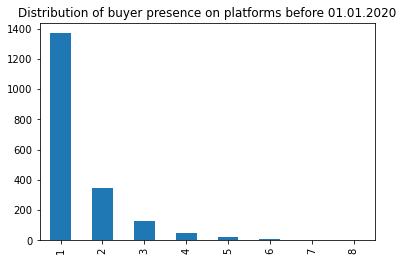

In [291]:
# I want to see distribution of presence on platforms
new_1['count'].value_counts().plot.bar(title ='Distribution of buyer presence on platforms before 01.01.2020')

In [292]:
new = count_platforms.groupby(['responsibleorg_regnum']).size().reset_index()

buyers = list(new.responsibleorg_regnum)
buyers

[1012000073,
 1042000029,
 1072000045,
 1082000029,
 1112000046,
 1182000038,
 1212000034,
 1221000135,
 1292000041,
 1382000040,
 1442000056,
 1481000014,
 1481000016,
 1481000021,
 1483000004,
 1483000015,
 1483000068,
 1483000069,
 1483000082,
 1483000083,
 1483000110,
 1483000124,
 1483000145,
 1483000146,
 1483000147,
 1483000159,
 1483000170,
 1483000183,
 1483000193,
 1483000259,
 1483000280,
 1483000351,
 1483000383,
 1483000407,
 1483000418,
 1522000043,
 1582000037,
 1692000021,
 1721000072,
 1731000001,
 1731000003,
 1731000004,
 1731000009,
 1731000012,
 1731000014,
 1731000015,
 1731000017,
 1731000018,
 1731000022,
 1731000023,
 1731000027,
 1731000028,
 1731000029,
 1731000031,
 1731000032,
 1731000034,
 1731000035,
 1731000036,
 1731000037,
 1731000038,
 1731000042,
 1731000047,
 1731000048,
 1731000049,
 1731000050,
 1731000051,
 1731000053,
 1731000055,
 1731000056,
 1731000057,
 1731000059,
 1731000060,
 1731000064,
 1731000065,
 1731000066,
 1731000067,
 1731000068,

In [293]:
# I want to select list of buyers who are only in 1 platform
new = count_platforms.groupby(['responsibleorg_regnum']).filter(lambda x: len(x) == 1
                                                               ).reset_index()

buyers_treated = list(new.responsibleorg_regnum)
buyers_treated

[1042000029,
 1072000045,
 1082000029,
 1112000046,
 1182000038,
 1212000034,
 1221000135,
 1292000041,
 1442000056,
 1481000016,
 1481000021,
 1483000110,
 1483000146,
 1483000147,
 1483000170,
 1483000183,
 1483000193,
 1483000259,
 1483000351,
 1483000383,
 1483000407,
 1483000418,
 1582000037,
 1731000004,
 1731000009,
 1731000012,
 1731000014,
 1731000015,
 1731000017,
 1731000023,
 1731000027,
 1731000028,
 1731000029,
 1731000031,
 1731000032,
 1731000034,
 1731000036,
 1731000038,
 1731000042,
 1731000047,
 1731000049,
 1731000055,
 1731000056,
 1731000059,
 1731000065,
 1731000066,
 1731000067,
 1731000073,
 1731000074,
 1731000075,
 1731000078,
 1731000082,
 1731000083,
 1731000086,
 1731000088,
 1731000090,
 1731000091,
 1731000092,
 1731000098,
 1731000099,
 1731000104,
 1731000105,
 1731000108,
 1731000109,
 1731000112,
 1731000113,
 1731000115,
 1731000120,
 1731000124,
 1731000125,
 1731000126,
 1731000128,
 1731000131,
 1731000132,
 1731000134,
 1731000135,
 1731000140,

In [294]:

#I want to limit data only to the buyers present in buyers list(this way I get rid of new buyers)
# For this I check whether I have the same number of buyers - yes
la = data_final.groupby(['responsibleorg_regnum']).size()
la

responsibleorg_regnum
1012000073     105
1042000029      25
1072000045       2
1082000029       6
1112000046      29
              ... 
21007000013     51
21007000024      2
21007000029     19
21007000030     16
21007000035     20
Length: 1928, dtype: int64

In [307]:
# Moreover I create a dummy variable whether purchase happened before or after reform ( reform was on 2019-07-01)

import time 
import datetime 
import pytz

utc=pytz.UTC # I needed to do it since I had a mistake that naive and aware objects couldn't be compared
  
string = '2020-01-01'  
  
element = datetime.datetime.strptime(string,"%Y-%m-%d")
element = utc.localize(element)
data_final['reform']= data_final.docpublishdate_new.apply(lambda x: 1 if  x > element else 0)

In [309]:
data_final.reform.describe()

count    284966.000000
mean          0.001386
std           0.037205
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: reform, dtype: float64

In [ ]:
# Now let's get back to our data set and select buyers into control and treatment groups
data_final['treatment_group']= data_final.responsibleorg_regnum.apply(lambda x: 1 if  x in buyers_treated else 0)

In [326]:
# Moreover I want to convert days to int format and I do:
data_final['execution_period'] = data_final['execution_period'].dt.days

In [327]:
# Let's aggregate data by month and count will be number of contracts per months
data = data_final.groupby(['responsibleorg_regnum','month_year']).agg(['mean','count', 'nunique']).reset_index()
data

responsibleorg_regnum month_year            id                \
                                                mean count nunique   
0                1012000073    2018-01  1.508158e+07     5       5   
1                1012000073    2018-02  1.550665e+07     1       1   
2                1012000073    2018-03  1.581414e+07     9       9   
3                1012000073    2018-04  1.622697e+07     3       3   
4                1012000073    2018-06  1.685981e+07     4       4   
...                     ...        ...           ...   ...     ...   
22707           21007000030    2019-10  2.185173e+07     3       3   
22708           21007000030    2019-12  2.245765e+07    13      13   
22709           21007000035    2019-10  2.172447e+07     4       4   
22710           21007000035    2019-11  2.221214e+07    13      13   
22711           21007000035    2019-12  2.251481e+07     3       3   

            purchasenumber               responsibleorg_inn        ...  \
                      mean count nunique               mean count  ...   
0       101200007318000000     5       5         7708026538     5  ...   
1       101200007318000016     1       1         7708026538     1  ...   
2       101200007318000016     9       9         7708026538     9  ...   
3       101200007318000016     3       3         7708026538     3  ...   
4       101200007318000032     4       4         7708026538     4  ...   
...                    ...   ...     ...                ...   ...  ...   
22707  2100700003019000064     3       3         7703770101     3  ...   
22708  2100700003019000576    13      13         7703770101    13  ...   
22709  2100700003519000064     4       4         7725727149     4  ...   
22710  2100700003519000320    13      13         7725727149    13  ...   
22711  2100700003518999808     3       3         7725727149     3  ...   

      execution_period ratio_final_to_reserve_price                \
               nunique                         mean count nunique   
0                    0                          NaN     0       0   
1                    0                          NaN     0       0   
2                    1                      0.89815     1       1   
3                    0                          NaN     0       0   
4                    0                          NaN     0       0   
...                ...                          ...   ...     ...   
22707                0                          NaN     0       0   
22708                0                          NaN     0       0   
22709                0                          NaN     0       0   
22710                0                          NaN     0       0   
22711                0                          NaN     0       0   

      treatment_group               reform                
                 mean count nunique   mean count nunique  
0                   0     5       1      0     5       1  
1                   0     1       1      0     1       1  
2                   0     9       1      0     9       1  
3                   0     3       1      0     3       1  
4                   0     4       1      0     4       1  
...               ...   ...     ...    ...   ...     ...  
22707               1     3       1      0     3       1  
22708               1    13       1      0    13       1  
22709               1     4       1      0     4       1  
22710               1    13       1      0    13       1  
22711               1     3       1      0     3       1  

[22712 rows x 44 columns]

In [328]:
data.execution_period.describe()

,mean,count,nunique
count,2815.000000,22712.000000,22712.000000
mean,356.134850,0.159035,0.156217
std,400.166445,0.516027,0.500967
min,0.000000,0.000000,0.000000
25%,199.000000,0.000000,0.000000
50%,359.500000,0.000000,0.000000
75%,398.000000,0.000000,0.000000
max,17897.000000,12.000000,12.000000


In [314]:
data.supplier_inn.describe()

,mean,count,nunique
count,2.675000e+03,22712.000000,22712.000000
mean,7.092852e+09,0.148336,0.146795
std,1.524600e+09,0.486679,0.473999
min,2.450215e+08,0.000000,0.000000
25%,6.813846e+09,0.000000,0.000000
50%,7.714382e+09,0.000000,0.000000
75%,7.727063e+09,0.000000,0.000000
max,9.731045e+09,12.000000,10.000000


In [320]:
data

responsibleorg_regnum month_year            id                \
                                                mean count nunique   
0                1012000073    2018-01  1.508158e+07     5       5   
1                1012000073    2018-02  1.550665e+07     1       1   
2                1012000073    2018-03  1.581414e+07     9       9   
3                1012000073    2018-04  1.622697e+07     3       3   
4                1012000073    2018-06  1.685981e+07     4       4   
...                     ...        ...           ...   ...     ...   
22707           21007000030    2019-10  2.185173e+07     3       3   
22708           21007000030    2019-12  2.245765e+07    13      13   
22709           21007000035    2019-10  2.172447e+07     4       4   
22710           21007000035    2019-11  2.221214e+07    13      13   
22711           21007000035    2019-12  2.251481e+07     3       3   

            purchasenumber               responsibleorg_inn        ...  \
                      mean count nunique               mean count  ...   
0       101200007318000000     5       5         7708026538     5  ...   
1       101200007318000016     1       1         7708026538     1  ...   
2       101200007318000016     9       9         7708026538     9  ...   
3       101200007318000016     3       3         7708026538     3  ...   
4       101200007318000032     4       4         7708026538     4  ...   
...                    ...   ...     ...                ...   ...  ...   
22707  2100700003019000064     3       3         7703770101     3  ...   
22708  2100700003019000576    13      13         7703770101    13  ...   
22709  2100700003519000064     4       4         7725727149     4  ...   
22710  2100700003519000320    13      13         7725727149    13  ...   
22711  2100700003518999808     3       3         7725727149     3  ...   

      supplier_inn ratio_final_to_reserve_price               treatment_group  \
           nunique                         mean count nunique            mean   
0                0                          NaN     0       0               0   
1                0                          NaN     0       0               0   
2                1                      0.89815     1       1               0   
3                0                          NaN     0       0               0   
4                0                          NaN     0       0               0   
...            ...                          ...   ...     ...             ...   
22707            0                          NaN     0       0               1   
22708            0                          NaN     0       0               1   
22709            0                          NaN     0       0               1   
22710            0                          NaN     0       0               1   
22711            0                          NaN     0       0               1   

                    reform                
      count nunique   mean count nunique  
0         5       1      0     5       1  
1         1       1      0     1       1  
2         9       1      0     9       1  
3         3       1      0     3       1  
4         4       1      0     4       1  
...     ...     ...    ...   ...     ...  
22707     3       1      0     3       1  
22708    13       1      0    13       1  
22709     4       1      0     4       1  
22710    13       1      0    13       1  
22711     3       1      0     3       1  

[22712 rows x 41 columns]

In [321]:


os.getcwd()

'C:\\notifications_out'

In [95]:
data_final.to_csv('data_final.csv', encoding = 'utf-8') # I write this final data set to csv

In [342]:
# I had a problem in STATA: Unmatched quote while processing row 362743; this can be due to a formatting problem in the file or
   # because a quoted data element spans multiple lines. You should carefully inspect your data after importing.
    #Consider using option bindquote(strict) if quoted data spans multiple lines or option bindquote(nobind) if
    #quotes are not used for binding data.
    
# So I just decided to export to STATA only data I specifically need to run a regression instead of fixing this problem  

data_final_reduced = data[[ 'responsibleorg_regnum', 'execution_period','final_price','max_price','supplier_inn',
                                'month_year','treatment_group','reform']].copy()



ModuleNotFoundError: No module named 'datequarter'

In [348]:
data_final_reduced.head()

responsibleorg_regnum execution_period               final_price        \
                                    mean count nunique        mean count   
0            1012000073              NaN     0       0         NaN     0   
1            1012000073              NaN     0       0         NaN     0   
2            1012000073            257.0     1       1     20484.0     1   
3            1012000073              NaN     0       0         NaN     0   
4            1012000073              NaN     0       0         NaN     0   

            max_price                supplier_inn               month_year  \
  nunique        mean count nunique          mean count nunique              
0       0  288192.968     5       5           NaN     0       0    2018-01   
1       0   46553.460     1       1           NaN     0       0    2018-02   
2       1   68880.200     9       9  7.717544e+09     1       1    2018-03   
3       0  114358.470     3       3           NaN     0       0    2018-04   
4       0  188259.530     4       4           NaN     0       0    2018-06   

  treatment_group               reform                
             mean count nunique   mean count nunique  
0               0     5       1      0     5       1  
1               0     1       1      0     1       1  
2               0     9       1      0     9       1  
3               0     3       1      0     3       1  
4               0     4       1      0     4       1

In [344]:
data_final_reduced.to_csv('data_final_reduced.csv', encoding = 'utf-8') # I write this final data set to csv

In [345]:
os.getcwd()

'C:\\notifications_out'

In [346]:
data_final_reduced.final_price.describe()

,mean,count,nunique
count,2.815000e+03,22712.000000,22712.000000
mean,4.391380e+07,0.159035,0.158991
std,5.544196e+08,0.516027,0.515742
min,5.398100e+02,0.000000,0.000000
25%,4.445621e+05,0.000000,0.000000
50%,1.658404e+06,0.000000,0.000000
75%,6.273486e+06,0.000000,0.000000
max,1.986370e+10,12.000000,12.000000


In [347]:
data_final.max_price

0         7.520121e+04
1         4.990000e+05
2         2.423600e+05
3         4.903320e+05
4         1.340716e+05
              ...     
284961    5.407720e+07
284962    1.509634e+08
284963    6.593780e+07
284964    6.044298e+07
284965    6.044298e+07
Name: max_price, Length: 284966, dtype: float64